### Resampling Methods

Resampling methods are an indispensable tool in modern statistics. They
involve repeatedly drawing samples from a training set and refitting a model
of interest on each sample in order to obtain additional information about
the fitted model. For example, in order to estimate the variability of a linear
regression fit, we can repeatedly draw different samples from the training
data, fit a linear regression to each new sample, and then examine the
extent to which the resulting fits differ. Such an approach may allow us to
obtain information that would not be available from fitting the model only
once using the original training sample.

Cross-validation can be used to estimate the test error associated with a given statistical learning method in order to evaluate
its performance, or to select the appropriate level of flexibility. 

The process of evaluating a model’s performance is known as model assessment, whereas model
the process of selecting the proper level of flexibility for a model is known as
model selection. 

The bootstrap is used in several contexts, most commonly model
to provide a measure of accuracy of a parameter estimate or of a given statistical learning method.

#### Cross-Validation

The test error is the average error that results from using
a statistical learning method to predict the response on a new observation—
that is, a measurement that was not used in training the method. Given
a data set, the use of a particular statistical learning method is warranted
if it results in a low test error. The test error can be easily calculated if a
designated test set is available. Unfortunately, this is usually not the case.
In contrast, the training error can be easily calculated by applying the
statistical learning method to the observations used in its training. But as
we saw in Chapter 2, the training error rate often is quite different from the
test error rate, and in particular the former can dramatically underestimate
the latter.

In the absence of a very large designated test set that can be used to
directly estimate the test error rate, a number of techniques can be used
to estimate this quantity using the available training data. Some methods
make a mathematical adjustment to the training error rate in order to
estimate the test error rate. Such approaches are discussed.
In this section, we instead consider a class of methods that estimate the
test error rate by holding out a subset of the training observations from the
fitting process, and then applying the statistical learning method to those
held out observations.

#####  The Validation Set Approach

Suppose that we would like to estimate the test error associated with fit
ting a particular statistical learning method on a set of observations. The
validation set approach, displayed in Figure 5.1, is a very simple strategy validation
for this task. It involves randomly dividing the available set of observa
tions into two parts, a training set and a validation set or hold-out set. The validation
model is fit on the training set, and the fitted model is used to predict the
responses for the observations in the validation set. The resulting validation
set error rate—typically assessed using MSE in the case of a quantitative
response—provides an estimate of the test error rate.
Weillustrate the validation set approach on the Auto data set. Recall from
Chapter 3 that there appears to be a non-linear relationship between mpg
and horsepower, and that a model that predicts mpg using horsepower and
horsepower2 gives better results than a model that uses only a linear term.
It is natural to wonder whether a cubic or higher-order fit might provide
even better results. We answer this question in Chapter 3 by looking at
the p-values associated with a cubic term and higher-order polynomial
terms in a linear regression. But we could also answer this question using
the validation method. We randomly split the 392 observations into two sets, a training set containing 196 of the data points, and a validation set
containing the remaining 196 observations. The validation set error rates
that result from fitting various regression models on the training sample
and evaluating their performance on the validation sample, using MSE
as a measure of validation set error, are shown in the left-hand panel of
Figure 5.2. The validation set MSE for the quadratic fit is considerably
smaller than for the linear fit. However, the validation set MSE for the cubic
f
it is actually slightly larger than for the quadratic fit. This implies that
including a cubic term in the regression does not lead to better prediction
than simply using a quadratic term.
Recall that in order to create the left-hand panel of Figure 5.2, we ran
domly divided the data set into two parts, a training set and a validation
set. If we repeat the process of randomly splitting the sample set into two
parts, we will get a somewhat different estimate for the test MSE. As an
illustration, the right-hand panel of Figure 5.2 displays ten different vali
dation set MSE curves from the Auto data set, produced using ten different
random splits of the observations into training and validation sets. All ten
curves indicate that the model with a quadratic term has a dramatically
smaller validation set MSE than the model with only a linear term. Fur
thermore, all ten curves indicate that there is not much benefit in including
cubic or higher-order polynomial terms in the model. But it is worth noting
that each of the ten curves results in a different test MSE estimate for each
of the ten regression models considered. And there is no consensus among
the curves as to which model results in the smallest validation set MSE.
Based on the variability among these curves, all that we can conclude with
any confidence is that the linear fit is not adequate for this data.
The validation set approach is conceptually simple and is easy to imple
ment. But it has two potential drawbacks:
1. As is shown in the right-hand panel of Figure 5.2, the validation esti
mate of the test error rate can be highly variable, depending on pre
cisely which observations are included in the training set and which
observations are included in the validation set.
2. In the validation approach, only a subset of the observations—those
that are included in the training set rather than in the validation
set—are used to fit the model. Since statistical methods tend to per
form worse when trained on fewer observations, this suggests that the validation set error rate may tend to overestimate the test error rate
for the model fit on the entire data set.
In the coming subsections, we will present cross-validation, a refinement of
the validation set approach that addresses these two issues.


##### Leave-One-Out Cross-Validation

5.1.2 Leave-One-Out Cross-Validation
Leave-one-out cross-validation (LOOCV) is closely related to the validation leave-one
set approach of Section 5.1.1, but it attempts to address that method’s
drawbacks.
Like the validation set approach, LOOCV involves splitting the set of
observations into two parts. However, instead of creating two subsets of
comparable size, a single observation (x1,y1) is used for the validation
set, and the remaining observations {(x2,y2),...,(xn,yn)} make up the
training set. The statistical learning method is fit on the n 1 training
observations, and a prediction ˆy1 is made for the excluded observation,
using its value x1. Since (x1,y1) was not used in the fitting process, MSE1 =
(y1 
ˆ
y1)2 provides an approximately unbiased estimate for the test error.
But even though MSE1 is unbiased for the test error, it is a poor estimate
because it is highly variable, since it is based upon a single observation
(x1,y1).
We can repeat the procedure by selecting (x2,y2) for the validation
data, training the statistical learning procedure on the n 1 observations
{(x1,y1),(x3,y3),...,(xn,yn)}, and computing MSE2 =(y2 ˆy2)2. Repeat
ing this approach n times produces n squared errors, MSE1,..., MSEn.
The LOOC proach n times produces n squared errors, MSE1,..., MSEn.
The LOOCV estimate for the test MSE is the average of these n test error
estimates:
CV(n) = 1
n 
n
i=1 
MSEi.
(5.1)

LOOCV has a couple of major advantages over the validation set ap
proach. First, it has far less bias. In LOOCV, we repeatedly fit the sta
tistical learning method using training sets that contain n 1 observa
tions, almost as many as are in the entire data set. This is in contrast to
the validation set approach, in which the training set is typically around
half the size of the original data set. Consequently, the LOOCV approach
tends not to overestimate the test error rate as much as the validation
set approach does. Second, in contrast to the validation approach which
will yield different results when applied repeatedly due to randomness in
the training/validation set splits, performing LOOCV multiple times will
always yield the same results: there is no randomness in the training/vali
dation set splits.

LOOCVhas the potential to be expensive to implement, since the model
has to be fit n times. This can be very time consuming if n is large, and if
each individual model is slow to fit. With least squares linear or polynomial
regression, an amazing shortcut makes the cost of LOOCV the same as that
of a single model fit! The following formula holds:
CV(n) = 1
n 
n
i=1 
yi ˆyi
2
,
(5.2)

where ˆyi is the ith fitted value from the original least squares fit, and hi is
the leverage defined in (3.37) on page 105.1 This is like the ordinary MSE,
except the ith residual is divided by 1 hi. The leverage lies between 1/n
and 1, and reflects the amount that an observation influences its own fit.
Hence the residuals for high-leverage points are inflated in this formula by
exactly the right amount for this equality to hold.
LOOCV is a very general method, and can be used with any kind of
predictive modeling. For example we could use it with logistic regression
or linear discriminant analysis, or any of the methods discussed in later
chapters. The magic formula (5.2) does not hold in general, in which case
the model has to be refit n times

#####  k-Fold Cross-Validation

An alternative to LOOCV is k-fold CV. This approach involves randomly k-fold CV
dividing the set of observations into k groups, or folds, of approximately
equal size. The first fold is treated as a validation set, and the method
is fit on the remaining k 1 folds. The mean squared error, MSE1, is
then computed on the observations in the held-out fold. This procedure is
repeated k times; each time, a different group of observations is treated
as a validation set. This process results in k estimates of the test error,
MSE1,MSE2,...,MSEk. The k-fold CV estimate is computed by averaging
these values,
CV(k) = 1
k 
k
i=1 
MSEi.
Figure 5.5 illustrates the k-fold CV approach.
(5.3)

It is not hard to see that LOOCV is a special case of k-fold CV in which k
is set to equal n. In practice, one typically performs k-fold CV using k =5
or k = 10. What is the advantage of using k =5or k = 10 rather than
k = n? The most obvious advantage is computational. LOOCV requires
f
itting the statistical learning method n times. This has the potential to be
computationally expensive (except for linear models fit by least squares,
in which case formula (5.2) can be used). But cross-validation is a very
general approach that can be applied to almost any statistical learning
method. Some statistical learning methods have computationally intensive
f
itting procedures, and so performing LOOCV may pose computational
problems, especially if n is extremely large. In contrast, performing 10-fold
CV requires fitting the learning procedure only ten times, which may be
much more feasible. As we see in Section 5.1.4, there also can be other
non-computational advantages to performing 5-fold or 10-fold CV, which
involve the bias-variance trade-off.
The right-hand panel of Figure 5.4 displays nine different 10-fold CV
estimates for the Auto data set, each resulting from a different random split
of the observations into ten folds. As we can see from the figure, there is
some variability in the CV estimates as a result of the variability in how
the observations are divided into ten folds. But this variability is typically
much lower than the variability in the test error estimates that results from
the validation set approach (right-hand panel of Figure 5.2).
When we examine real data, we do not know the true test MSE, and
so it is difficult to determine the accuracy of the cross-validation estimate.
However, if we examine simulated data, then we can compute the true
test MSE, and can thereby evaluate the accuracy of our cross-validation
results. In Figure 5.6, we plot the cross-validation estimates and true test
error rates that result from applying smoothing splines to the simulated
data sets illustrated in Figures 2.9–2.11 of Chapter 2. The true test MSE
is displayed in blue. The black dashed and orange solid lines respectively
show the estimated LOOCV and 10-fold CV estimates. In all three plots,
the two cross-validation estimates are very similar.

rue test MSE.
When we perform cross-validation, our goal might be to determine how
well a given statistical learning procedure can be expected to perform on
independent data; in this case, the actual estimate of the test MSE is
of interest. But at other times we are interested only in the location of
the minimum point in the estimated test MSE curve. This is because we
might be performing cross-validation on a number of statistical learning
methods, or on a single method using different levels of flexibility, in order
to identify the method that results in the lowest test error. For this purpose,
the location of the minimum point in the estimated test MSE curve is
important, but the actual value of the estimated test MSE is not. We find
in Figure 5.6 that despite the fact that they sometimes underestimate the
true test MSE, all of the CV curves come close to identifying the correct
level of flexibility—that is, the flexibility level corresponding to the smallest
test MSE.

##### Bias-Variance Trade-Off for k-Fold Cross-Validation

 k-fold CV with k<nhas a compu
tational advantage to LOOCV. But putting computational issues aside,
a less obvious but potentially more important advantage of k-fold CV is
that it often gives more accurate estimates of the test error rate than does
LOOCV. This has to do with a bias-variance trade-off.
It was mentioned in Section 5.1.1 that the validation set approach can
lead to overestimates of the test error rate, since in this approach the
training set used to fit the statistical learning method contains only half
the observations of the entire data set. Using this logic, it is not hard to see that LOOCV will give approximately unbiased estimates of the test error,
since each training set contains n 1 observations, which is almost as many
as the number of observations in the full data set. And performing k-fold
CV for, say, k =5or k = 10 will lead to an intermediate level of bias,
since each training set contains approximately (k 1)n/k observations—
fewer than in the LOOCV approach, but substantially more than in the
validation set approach. Therefore, from the perspective of bias reduction,
it is clear that LOOCV is to be preferred to k-fold CV.
However, we know that bias is not the only source for concern in an esti
mating procedure; we must also consider the procedure’s variance. It turns
out that LOOCV has higher variance than does k-fold CV with k<n.Why
is this the case? When we perform LOOCV, we are in effect averaging the
outputs of n fitted models, each of which is trained on an almost identical
set of observations; therefore, these outputs are highly (positively) corre
lated with each other. In contrast, when we perform k-fold CV with k<n,
we are averaging the outputs of k fitted models that are somewhat less
correlated with each other, since the overlap between the training sets in
each model is smaller. Since the mean of many highly correlated quantities
has higher variance than does the mean of many quantities that are not
as highly correlated, the test error estimate resulting from LOOCV tends
to have higher variance than does the test error estimate resulting from
k-fold CV.
To summarize, there is a bias-variance trade-off associated with the
choice of k in k-fold cross-validation. Typically, given these considerations,
one performs k-fold cross-validation using k =5or k = 10, as these values
have been shown empirically to yield test error rate estimates that suffer
neither from excessively high bias nor from very high variance.


#####  Cross-Validation on Classification Problems

Cross-validation can also be a very useful
approach in the classification setting when Y is qualitative. In this setting,
cross-validation works just as described earlier in this chapter, except that
rather than using MSE to quantify test error, we instead use the number
of misclassified observations. For instance, in the classification setting, the
LOOCV error rate takes the form
CV(n) = 1
n 
n
i=1 
Erri,
where Erri = I(yi=ˆ
(5.4)
yi). The k-fold CV error rate and validation set error
rates are defined analogously.
As an example, we fit various logistic regression models on the two
dimensional classification data displayed in Figure 2.13. In the top-left
panel of Figure 5.7, the black solid line shows the estimated decision bound
ary resulting from fitting a standard logistic regression model to this data
set. Since this is simulated data, we can compute the true test error rate,
which takes a value of 0.201 and so is substantially larger than the Bayes errorrateof0.133.Clearlylogisticregressiondoesnothaveenoughflexi
bilitytomodel theBayesdecisionboundaryinthissetting.Wecaneasily
extendlogisticregressiontoobtainanon-lineardecisionboundarybyusing
polynomialfunctionsofthepredictors,aswedidintheregressionsettingin
Section3.3.2.Forexample,wecanfitaquadraticlogisticregressionmodel,
givenby
log p
1 p = 0+ 1X1+ 2X2
1+ 3X2+ 4X2
2. (5.5)
Thetop-rightpanelofFigure5.7displaystheresultingdecisionboundary,
whichisnowcurved.However,thetesterrorratehasimprovedonlyslightly,
to0.197.Amuchlargerimprovementisapparentinthebottom-leftpanel of Figure 5.7, in which we have fit a logistic regression model involving
cubic polynomials of the predictors. Now the test error rate has decreased
to 0.160. Going to a quartic polynomial (bottom-right) slightly increases
the test error.
In practice, for real data, the Bayes decision boundary and the test er
ror rates are unknown. So how might we decide between the four logistic
regression models displayed in Figure 5.7? We can use cross-validation in
order to make this decision. The left-hand panel of Figure 5.8 displays in
black the 10-fold CV error rates that result from fitting ten logistic regres
sion models to the data, using polynomial functions of the predictors up
to tenth order. The true test errors are shown in brown, and the training
errors are shown in blue. As we have seen previously, the training error
tends to decrease as the flexibility of the fit increases. (The figure indicates
that though the training error rate doesn’t quite decrease monotonically,
it tends to decrease on the whole as the model complexity increases.) In
contrast, the test error displays a characteristic U-shape. The 10-fold CV
error rate provides a pretty good approximation to the test error rate.
While it somewhat underestimates the error rate, it reaches a minimum
when fourth-order polynomials are used, which is very close to the min
imum of the test curve, which occurs when third-order polynomials are
used. In fact, using fourth-order polynomials would likely lead to good test
set performance, as the true test error rate is approximately the same for
third, fourth, fifth, and sixth-order polynomials.
The right-hand panel of Figure 5.8 displays the same three curves us
ing the KNN approach for classification, as a function of the value of K
(which in this context indicates the number of neighbors used in the KNN
classifier, rather than the number of CV folds used). Again the training
error rate declines as the method becomes more flexible, and so we see that
the training error rate cannot be used to select the optimal value for K.
Though the cross-validation error curve slightly underestimates the test error rate, it takes on a minimum very close to the best value for K.

####  The Bootstrap

The bootstrap is a widely applicable and extremely powerful statistical tool bootstrap
that can be used to quantify the uncertainty associated with a given esti
mator or statistical learning method. As a simple example, the bootstrap
can be used to estimate the standard errors of the coefficients from a linear
regression fit. In the specific case of linear regression, this is not particularly
useful, since we saw in Chapter 3 that standard statistical software such as
R outputs such standard errors automatically. However, the power of the
bootstrap lies in the fact that it can be easily applied to a wide range of
statistical learning methods, including some for which a measure of vari
ability is otherwise difficult to obtain and is not automatically output by
statistical software.
In this section we illustrate the bootstrap on a toy example in which we
wish to determine the best investment allocation under a simple model.
In Section 5.3 we explore the use of the bootstrap to assess the variability
associated with the regression coefficients in a linear model fit.
Suppose that we wish to invest a fixed sum of money in two financial
assets that yield returns of X and Y, respectively, where X and Y are
random quantities. We will invest a fraction of our money in X, and will
invest the remaining 1 
in Y. Since there is variability associated with
the returns on these two assets, we wish to choose to minimize the total
risk, or variance, of our investment. In other words, we want to minimize
Var( X+(1 )Y). One can show that the value that minimizes the risk
is given by

2=
Y 
XY
2
X + 2
Y 2XY

(5.6)

where 2
X = Var(X), 2
Y = Var(Y), and XY = Cov(X,Y).
In reality, the quantities 2
X, 2
Y , and XY are unknown. We can compute
estimates for these quantities, ˆ2
X, ˆ2
Y , and ˆXY, using a data set that
contains past measurements for X and Y . We can then estimate the value
of 
that minimizes the variance of our investment using

ˆ= ˆ2
Y ˆXY
ˆ2
X +ˆ2
Y 2ˆXY 
.
(5.7)

Figure 5.9 illustrates this approach for estimating on a simulated data
set. In each panel, we simulated 100 pairs of returns for the investments
X and Y. We used these returns to estimate 2
X, 2
Y, and XY, which we
then substituted into (5.7) in order to obtain estimates for . The value of
ˆresulting from each simulated data set ranges from 0.532 to 0.657.
It is natural to wish to quantify the accuracy of our estimate of .To
estimate the standard deviation of ˆ, we repeated the process of simu
lating 100 paired observations of X and Y , and estimating using (5.7),
1,000 times. We thereby obtained 1,000 estimates for , which we can call
ˆ1, ˆ2,...,ˆ1,000. The left-hand panel of Figure 5.10 displays a histogram
of the resulting estimates. For these simulations the parameters were set to
2
X =1, 2
Y =1.25, and XY =0.5, and so we know that the true value of
is 0.6. We indicated this value using a solid vertical line on the histogram.


Themeanoverall1,000estimatesfor is
¯= 1
1000
1000
r=1
ˆr=0.5996,
verycloseto =0.6,andthestandarddeviationoftheestimatesis
1
1000 1
1000
r=1
(ˆr ¯)2=0.083.
Thisgivesusaverygood ideaof theaccuracyof ˆ: SE(ˆ) 0.083. So
roughly speaking, for a randomsample fromthepopulation,wewould
expectˆtodifferfrom byapproximately0.08,onaverage.
Inpractice,however,theprocedureforestimatingSE(ˆ)outlinedabove
cannotbeapplied,becauseforrealdatawecannotgeneratenewsamples
fromtheoriginalpopulation.However, thebootstrapapproachallowsus
touseacomputer toemulate theprocessof obtainingnewsample sets,
sothatwecanestimatethevariabilityof ˆwithoutgeneratingadditional
samples.Ratherthanrepeatedlyobtainingindependentdatasetsfromthe
population,we insteadobtaindistinctdata setsbyrepeatedlysampling
observationsfromtheoriginaldataset.
Thisapproachis illustratedinFigure5.11onasimpledataset,which
wecallZ, thatcontainsonlyn=3observations.Werandomlyselectn
observations fromthedataset inorder toproduceabootstrapdataset, Z1. The sampling is performed with replacement, which means that the with
same observation can occur more than once in the bootstrap data set. In
this example, Z1 contains the third observation twice, the first observation
once, and no instances of the second observation. Note that if an observation
is contained in Z1, then both its X and Y values are included. We can use
Z1 to produce a new bootstrap estimate for , which we call ˆ 1. This
procedure is repeated B times for some large value of B, in order to produce
B different bootstrap data sets, Z1,Z2,...,ZB, and B corresponding 
estimates, ˆ 1, ˆ 2,...,ˆB. We can compute the standard error of these
bootstrap estimates using the formula
B
SEB(ˆ)=
1
B 1
r=1
ˆ r 
1
B 
B
r=1
ˆ r
2
.
(5.8)
This serves as an estimate of the standard error of ˆestimated from the
original data set.
The bootstrap approach is illustrated in the center panel of Figure 5.10,
which displays a histogram of 1,000 bootstrap estimates of , each com
puted using a distinct bootstrap data set. This panel was constructed on
the basis of a single data set, and hence could be created using real data.
Note that the histogram looks very similar to the left-hand panel, which
displays the idealized histogram of the estimates of obtained by generat
ing 1,000 simulated data sets from the true population. In particular the
bootstrap estimate SE(ˆ) from (5.8) is 0.087, very close to the estimate of
0.083 obtained using 1,000 simulated data sets. The right-hand panel dis
plays the information in the center and left panels in a different way, via
boxplots of the estimates for obtained by generating 1,000 simulated data
sets from the true population and using the bootstrap approach. Again, the
boxplots have similar spreads, indicating that the bootstrap approach can
be used to effectively estimate the variability associated with ˆ.


####  Lab:Cross-Validation and the Bootstrap

In [1]:
import numpy as np
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                            summarize,
                            poly)
from sklearn.model_selection import train_test_split

In [2]:
from functools import partial
from sklearn.model_selection import \
    (cross_validate,
     KFold,
     ShuffleSplit)
from sklearn.base import clone
from ISLP.models import sklearn_sm


##### The Validation Set Approach

In [3]:
Auto = load_data('Auto')
Auto_train, Auto_valid = train_test_split(Auto,
                                          test_size=196,
                                          random_state=0)

In [4]:
hp_mm = MS(['horsepower'])
X_train = hp_mm.fit_transform(Auto_train)
y_train = Auto_train['mpg']
model = sm.OLS(y_train, X_train)
results = model.fit()

In [5]:
X_valid = hp_mm.transform(Auto_valid)
y_valid = Auto_valid['mpg']
valid_pred = results.predict(X_valid)
np.mean((y_valid- valid_pred)**2)

23.616617069669882

In [7]:
def evalMSE(terms,
            response,
            train,
            test):
        
        mm = MS(terms)
        X_train = mm.fit_transform(train)
        y_train = train[response]
        
        X_test = mm.transform(test)
        y_test = test[response]
        results = sm.OLS(y_train, X_train).fit()
        test_pred = results.predict(X_test)
        return np.mean((y_test- test_pred)**2)

In [8]:
MSE = np.zeros(3)
for idx, degree in enumerate(range(1, 4)):
    MSE[idx] = evalMSE([poly('horsepower', degree)],
                       'mpg',
                       Auto_train,
                       Auto_valid)
MSE

array([23.61661707, 18.76303135, 18.79694163])

In [9]:
Auto_train, Auto_valid = train_test_split(Auto,
                                          test_size=196,
                                          random_state=3)
MSE = np.zeros(3)
for idx, degree in enumerate(range(1, 4)):
    MSE[idx] = evalMSE([poly('horsepower', degree)],
                       'mpg',
                       Auto_train,
                       Auto_valid)
MSE

array([20.75540796, 16.94510676, 16.97437833])

##### Cross-Validation

In [10]:
hp_model = sklearn_sm(sm.OLS,
                      MS(['horsepower']))
X, Y = Auto.drop(columns=['mpg']), Auto['mpg']
cv_results = cross_validate(hp_model,
                            X,
                            Y,
                            cv=Auto.shape[0])
cv_err = np.mean(cv_results['test_score'])
cv_err

24.231513517929226

In [11]:
cv_error = np.zeros(5)
H = np.array(Auto['horsepower'])
M = sklearn_sm(sm.OLS)
for i, d in enumerate(range(1,6)):
    X = np.power.outer(H, np.arange(d+1))
    M_CV = cross_validate(M,
                          X,
                          Y,
                          cv=Auto.shape[0])
    cv_error[i] = np.mean(M_CV['test_score'])
cv_error

array([24.23151352, 19.24821312, 19.33498406, 19.4244303 , 19.03322447])

In [12]:
A = np.array([3, 5, 9])
B = np.array([2, 4])
np.add.outer(A, B)

array([[ 5,  7],
       [ 7,  9],
       [11, 13]])

In [13]:
cv_error = np.zeros(5)
cv = KFold(n_splits=10,
           shuffle=True,
           random_state=0) # use same splits for each degree
for i, d in enumerate(range(1,6)):
    X = np.power.outer(H, np.arange(d+1))
    M_CV = cross_validate(M,
                          X,
                          Y,
                          cv=cv)
    cv_error[i] = np.mean(M_CV['test_score'])
cv_error

array([24.20766449, 19.18533142, 19.27626666, 19.47848402, 19.13718691])

In [14]:
validation = ShuffleSplit(n_splits=1,
                          test_size=196,
                          random_state=0)
results = cross_validate(hp_model,
                         Auto.drop(['mpg'], axis=1),
                         Auto['mpg'],
                         cv=validation);
results['test_score']

array([23.61661707])

In [15]:
validation = ShuffleSplit(n_splits=10,
                          test_size=196,
                          random_state=0)
results = cross_validate(hp_model,
                         Auto.drop(['mpg'], axis=1),
                         Auto['mpg'],
                         cv=validation)
results['test_score'].mean(), results['test_score'].std()

(23.802232661034164, 1.4218450941091882)

##### The Bootstrap

Estimating the Accuracy of a Statistic of Interest

In [16]:
Portfolio = load_data('Portfolio')
def alpha_func(D, idx):
    cov_ = np.cov(D[['X','Y']].loc[idx], rowvar=False)
    return ((cov_[1,1]- cov_[0,1]) /
            (cov_[0,0]+cov_[1,1]-2*cov_[0,1]))

In [17]:
alpha_func(Portfolio, range(100))

0.57583207459283

In [18]:
rng = np.random.default_rng(0)
alpha_func(Portfolio,
           rng.choice(100,
                      100,
                      replace=True))

0.6074452469619004

In [28]:
def boot_SE(func,
            D,
            n=None,
            B=1000,
            seed=0):
        rng = np.random.default_rng(seed)
        first_, second_ = 0, 0
        n = n or D.shape[0]
        for _ in range(B):
            idx = rng.choice(len(D), 
                             n, 
                             replace=True)

            value = func(D, idx)
            first_ += value
            second_ += value**2
        return np.sqrt(second_ / B- (first_ / B)**2)

In [29]:
alpha_SE = boot_SE(alpha_func,
                   Portfolio,
                   B=1000,
                   seed=0)
alpha_SE

0.09118176521277699

Estimating the Accuracy of a Linear Regression Model

In [30]:
def boot_OLS(model_matrix, response, D, idx):
    D_ = D.iloc[idx]
    Y_ = D_[response]
    X_ = clone(model_matrix).fit_transform(D_)
    return sm.OLS(Y_, X_).fit().params

In [31]:
hp_func = partial(boot_OLS, MS(['horsepower']), 'mpg')

In [32]:
rng = np.random.default_rng(0)
np.array([hp_func(Auto,
                  rng.choice(392,
                             392,
                             replace=True)) for _ in range(10)])

array([[39.88064456, -0.1567849 ],
       [38.73298691, -0.14699495],
       [38.31734657, -0.14442683],
       [39.91446826, -0.15782234],
       [39.43349349, -0.15072702],
       [40.36629857, -0.15912217],
       [39.62334517, -0.15449117],
       [39.0580588 , -0.14952908],
       [38.66688437, -0.14521037],
       [39.64280792, -0.15555698]])

In [33]:
hp_se = boot_SE(hp_func,
                Auto,
                B=1000,
                seed=10)
hp_se

intercept     0.848807
horsepower    0.007352
dtype: float64

In [34]:
hp_model.fit(Auto, Auto['mpg'])
model_se = summarize(hp_model.results_)['std err']
model_se

intercept     0.717
horsepower    0.006
Name: std err, dtype: float64

In [35]:
quad_model = MS([poly('horsepower', 2, raw=True)])
quad_func = partial(boot_OLS,
                    quad_model,
                    'mpg')
boot_SE(quad_func, Auto, B=1000)


intercept                                  2.067840
poly(horsepower, degree=2, raw=True)[0]    0.033019
poly(horsepower, degree=2, raw=True)[1]    0.000120
dtype: float64

In [36]:
M = sm.OLS(Auto['mpg'],
           quad_model.fit_transform(Auto))
summarize(M.fit())['std err']

intercept                                  1.800
poly(horsepower, degree=2, raw=True)[0]    0.031
poly(horsepower, degree=2, raw=True)[1]    0.000
Name: std err, dtype: float64

####  Exercises

Conceptual

1. Using basic statistical properties of the variance, as well as single-variable calculus, derive $$
\alpha = \frac{\sigma^2_Y - \sigma_{XY}}{\sigma^2_X + \sigma^2_Y - 2\sigma_{XY}}
 (5.6).$$ In other words, prove that $ \alpha $ given by (5.6) does indeed minimize $ \text{Var}(\alpha X + (1 - \alpha) Y)$.

We want to minimize the variance of a portfolio $\alpha X + (1-\alpha)Y$ with respect to $\alpha$.

##### Step 1: Express the variance

Using the basic properties of variance:

$$\text{Var}(\alpha X + (1-\alpha)Y) = \text{Var}(\alpha X) + \text{Var}((1-\alpha)Y) + 2\text{Cov}(\alpha X, (1-\alpha)Y)$$

##### Step 2: Apply variance properties

For constants $a$ and $b$:
- $\text{Var}(aX) = a^2\text{Var}(X)$
- $\text{Cov}(aX, bY) = ab\text{Cov}(X,Y)$

Therefore:

$$\text{Var}(\alpha X + (1-\alpha)Y) = \alpha^2\sigma^2_X + (1-\alpha)^2\sigma^2_Y + 2\alpha(1-\alpha)\sigma_{XY}$$

##### Step 3: Expand the expression

$$f(\alpha) = \alpha^2\sigma^2_X + (1-2\alpha + \alpha^2)\sigma^2_Y + 2\alpha(1-\alpha)\sigma_{XY}$$

$$= \alpha^2\sigma^2_X + \sigma^2_Y - 2\alpha\sigma^2_Y + \alpha^2\sigma^2_Y + 2\alpha\sigma_{XY} - 2\alpha^2\sigma_{XY}$$

$$= \alpha^2(\sigma^2_X + \sigma^2_Y - 2\sigma_{XY}) + \alpha(2\sigma_{XY} - 2\sigma^2_Y) + \sigma^2_Y$$

##### Step 4: Find the minimum using calculus

To minimize, take the derivative with respect to $\alpha$ and set it equal to zero:

$$\frac{df}{d\alpha} = 2\alpha(\sigma^2_X + \sigma^2_Y - 2\sigma_{XY}) + 2\sigma_{XY} - 2\sigma^2_Y = 0$$

##### Step 5: Solve for α

$$2\alpha(\sigma^2_X + \sigma^2_Y - 2\sigma_{XY}) = 2\sigma^2_Y - 2\sigma_{XY}$$

$$\alpha(\sigma^2_X + \sigma^2_Y - 2\sigma_{XY}) = \sigma^2_Y - \sigma_{XY}$$

$$\boxed{\alpha = \frac{\sigma^2_Y - \sigma_{XY}}{\sigma^2_X + \sigma^2_Y - 2\sigma_{XY}}}$$

##### Step 6: Verify this is a minimum

The second derivative is:

$$\frac{d^2f}{d\alpha^2} = 2(\sigma^2_X + \sigma^2_Y - 2\sigma_{XY})$$

For this to be a minimum, we need $\frac{d^2f}{d\alpha^2} > 0$, which requires:

$$\sigma^2_X + \sigma^2_Y - 2\sigma_{XY} > 0$$

This is guaranteed to be true because $\sigma^2_X + \sigma^2_Y - 2\sigma_{XY} = \text{Var}(X - Y) \geq 0$, with equality only when $X = Y$ almost surely.

**Therefore, the formula (5.6) is proven.**

2. We will now derive the probability that a given observation is part of a bootstrap sample. Suppose that we obtain a bootstrap sample from a set of $ n $ observations.

   (a) What is the probability that the first bootstrap observation is **not** the $ j $ th observation from the original sample? Justify your answer.
   


In bootstrap sampling, we sample **with replacement** from n observations. Each draw is independent and uniform.

For any single draw, the probability of selecting the jth observation is $\frac{1}{n}$.

Therefore, the probability that the first bootstrap observation is **NOT** the jth observation is:

$$P(\text{first obs} \neq j) = 1 - \frac{1}{n}$$

**Justification:** Since we sample uniformly at random from n observations, each observation has equal probability $\frac{1}{n}$ of being selected. The complement gives us the probability of not selecting observation j.

(b) What is the probability that the second bootstrap observation is **not** the $ j $ th observation from the original sample?

Since bootstrap sampling is done **with replacement**, each draw is independent of all previous draws.

Therefore, the probability that the second bootstrap observation is **NOT** the jth observation is:

$$P(\text{second obs} \neq j) = 1 - \frac{1}{n}$$

This is the same as part (a) because of independence and the fact that we're sampling with replacement.

(c) Argue that the probability that the $ j $ th observation is **not** in the bootstrap sample is $ (1 - \frac{1}{n})^n $.

Since we draw n observations with replacement, and each draw is independent, the jth observation is NOT in the bootstrap sample if and only if it is not selected in ANY of the n draws.

Using independence:

$$P(j \text{ not in bootstrap sample}) = P(\text{draw 1} \neq j) \times P(\text{draw 2} \neq j) \times \cdots \times P(\text{draw n} \neq j)$$

$$= \left(1 - \frac{1}{n}\right) \times \left(1 - \frac{1}{n}\right) \times \cdots \times \left(1 - \frac{1}{n}\right)$$

$$= \left(1 - \frac{1}{n}\right)^n$$

(d) When $n = 5$, what is the probability that the $j$ th observation is in the bootstrap sample?
   
   

The probability that the jth observation **IS** in the bootstrap sample is the complement:

$$P(j \text{ in bootstrap sample}) = 1 - P(j \text{ not in bootstrap sample}) = 1 - \left(1 - \frac{1}{n}\right)^n$$

For n = 5:

```python
n = 5
prob_not_in = (1 - 1/n)**n
prob_in = 1 - prob_not_in
print(f"When n = {n}:")
print(f"Probability j is NOT in bootstrap sample: {prob_not_in:.6f}")
print(f"Probability j IS in bootstrap sample: {prob_in:.6f}")
```

When n = 5:
Probability j is NOT in bootstrap sample: 0.327680
Probability j IS in bootstrap sample: 0.672320

**Answer: 0.6723 or approximately 67.23%**

(e) When $n = 100$, what is the probability that the $j$ th observation is in the bootstrap sample?

In [38]:
n = 100
prob_not_in = (1 - 1/n)**n
prob_in = 1 - prob_not_in
print(f"When n = {n}:")
print(f"Probability j is NOT in bootstrap sample: {prob_not_in:.6f}")
print(f"Probability j IS in bootstrap sample: {prob_in:.6f}")

When n = 100:
Probability j is NOT in bootstrap sample: 0.366032
Probability j IS in bootstrap sample: 0.633968


When $n$ = 100:

Probability $j$ is NOT in bootstrap sample: 0.366032

Probability $j$ IS in bootstrap sample: 0.633968

**Answer: 0.6340 or approximately 63.40%**

(f) When $n = 10,000$, what is the probability that the $j$ th observation is in the bootstrap sample?

In [39]:
n = 10000
prob_not_in = (1 - 1/n)**n
prob_in = 1 - prob_not_in
print(f"When n = {n}:")
print(f"Probability j is NOT in bootstrap sample: {prob_not_in:.6f}")
print(f"Probability j IS in bootstrap sample: {prob_in:.6f}")

When n = 10000:
Probability j is NOT in bootstrap sample: 0.367861
Probability j IS in bootstrap sample: 0.632139



When $n$ = 10000:

Probability $j$ is NOT in bootstrap sample: 0.367861

Probability $j$ IS in bootstrap sample: 0.632139

**Answer: 0.6321 or approximately 63.21%**

(g) Create a plot that displays, for each integer value of $n$ from 1 to 100,000, the probability that the $j$ th observation is in the bootstrap sample. Comment on what you observe.

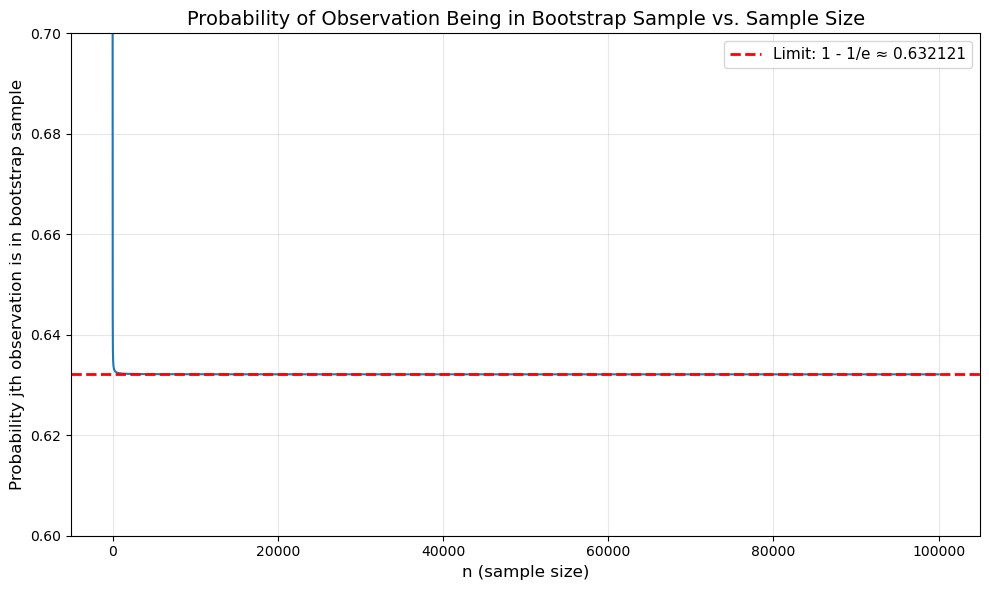


As n → ∞, the probability converges to: 1 - 1/e = 0.632121
This is approximately 63.21%


In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Create array of n values from 1 to 100,000
n_values = np.arange(1, 100001)

# Calculate probability that jth observation IS in bootstrap sample
prob_in_sample = 1 - (1 - 1/n_values)**n_values

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(n_values, prob_in_sample, linewidth=1.5)
plt.axhline(y=1 - 1/np.e, color='r', linestyle='--', linewidth=2, 
            label=f'Limit: 1 - 1/e ≈ {1 - 1/np.e:.6f}')
plt.xlabel('n (sample size)', fontsize=12)
plt.ylabel('Probability jth observation is in bootstrap sample', fontsize=12)
plt.title('Probability of Observation Being in Bootstrap Sample vs. Sample Size', 
          fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.ylim([0.6, 0.7])
plt.tight_layout()
plt.show()

# Print the limiting value
print(f"\nAs n → ∞, the probability converges to: 1 - 1/e = {1 - 1/np.e:.6f}")
print(f"This is approximately {100*(1 - 1/np.e):.2f}%")

**Observations:**

1. **Rapid convergence:** The probability quickly converges to a limiting value as n increases. Even by n = 20-30, the probability is very close to its asymptotic limit.

2. **Limiting value:** As $n \to \infty$, the probability converges to $1 - \frac{1}{e} \approx 0.6321$ (approximately 63.21%). This follows from the well-known limit:
   $$\lim_{n \to \infty} \left(1 - \frac{1}{n}\right)^n = \frac{1}{e}$$

3. **Practical implication:** Regardless of how large the original dataset is, any given observation has roughly a 63.2% chance of appearing in a bootstrap sample. This means approximately 36.8% of the original observations are **not** included in any given bootstrap sample.

4. **Monotonic increase:** The probability increases monotonically with n, starting at 0 when n=1 (since we can only select that one observation) and approaching the limit from below.

(h) We will now investigate numerically the probability that a bootstrap sample of size $n = 100$ contains the $j$ th observation. Here $j = 4$. We first create an array structure that will subsequently be overwritten using the function `np.empty()`. We then repeatedly create bootstrap samples, and each time we record whether or not the first observation is contained in the bootstrap sample.
   
   ```python
    rng = np.random.default_rng(0)
     = np.empty(10000)
    for i in range(10000):
        store[i] = np.sum(np.random.choice(100, replace=True) == 4)
    np.mean(store)
```
    
Comment on the results obtained.

In [41]:
import numpy as np

rng = np.random.default_rng(0)
store = np.empty(10000)

for i in range(10000):
    # Create bootstrap sample of size 100 from observations 0 to 99
    bootstrap_sample = rng.choice(100, size=100, replace=True)
    # Check if observation 4 is in the bootstrap sample
    store[i] = np.sum(bootstrap_sample == 4) > 0  # True if 4 appears at least once

empirical_prob = np.mean(store)
theoretical_prob = 1 - (1 - 1/100)**100

print(f"Empirical probability (from simulation): {empirical_prob:.6f}")
print(f"Theoretical probability: {theoretical_prob:.6f}")
print(f"Difference: {abs(empirical_prob - theoretical_prob):.6f}")
print(f"\nNumber of simulations where j=4 was in sample: {int(np.sum(store))}/10000")

Empirical probability (from simulation): 0.641300
Theoretical probability: 0.633968
Difference: 0.007332

Number of simulations where j=4 was in sample: 6413/10000


**Comments on the results:**

1. **Close agreement:** The empirical probability from the simulation closely matches the theoretical probability of approximately 0.634. With 10,000 simulations, we expect good convergence to the true value.

2. **Law of Large Numbers:** The simulation demonstrates the law of large numbers - as we increase the number of bootstrap replications, the empirical frequency converges to the theoretical probability.

3. **Code note:** The original code had `np.random.choice(100, replace=True)` which would only draw a single value. It should be `np.random.choice(100, size=100, replace=True)` to create a bootstrap sample of size 100.

4. **Interpretation:** Out of 10,000 bootstrap samples, observation j=4 appeared in approximately 6,340 of them, confirming our theoretical calculation that any given observation has about a 63.4% chance of being included in a bootstrap sample when n=100.

3. We now review **k-fold cross-validation**.

   (a) Explain how k-fold cross-validation is implemented.

   

**K-fold cross-validation** is implemented through the following steps:

##### Algorithm:

1. **Divide the data:** Randomly split the dataset into k groups (folds) of approximately equal size.

2. **Iterative training and validation:** For each fold i = 1, 2, ..., k:
   - Use fold i as the **validation set**
   - Use the remaining k-1 folds as the **training set**
   - Fit the model on the training set
   - Evaluate the model on the validation set and compute the error metric (e.g., MSE, classification error)
   - Store this error as $\text{MSE}_i$ (or other relevant metric)

3. **Aggregate results:** Compute the k-fold CV estimate as the average of the k validation errors:
   $$\text{CV}_{(k)} = \frac{1}{k}\sum_{i=1}^{k}\text{MSE}_i$$

4. **Model selection:** Use this CV estimate to compare different models or tuning parameters, selecting the one with the lowest CV error.

##### Common choices:
- **k = 5 or k = 10** are typical choices that balance bias and variance
- **k = n** gives Leave-One-Out Cross-Validation (LOOCV)

##### Example with k=5:
```
Fold 1: [Test] [Train] [Train] [Train] [Train]  → MSE₁
Fold 2: [Train] [Test] [Train] [Train] [Train]  → MSE₂
Fold 3: [Train] [Train] [Test] [Train] [Train]  → MSE₃
Fold 4: [Train] [Train] [Train] [Test] [Train]  → MSE₄
Fold 5: [Train] [Train] [Train] [Train] [Test]  → MSE₅

CV₍₅₎ = (MSE₁ + MSE₂ + MSE₃ + MSE₄ + MSE₅) / 5
```




(b) What are the advantages and disadvantages of k-fold cross-validation relative to:
   
i. The validation set approach?

ii. LOOCV?

##### i. K-fold CV vs. Validation Set Approach

**Validation Set Approach:** Randomly split data into two parts (e.g., 50-50 or 70-30), use one for training and one for validation.

#### Advantages of k-fold CV:

1. **More efficient use of data:** Every observation is used for both training and validation (just not simultaneously). This is especially important with limited data.

2. **More reliable error estimate:** By averaging over k different validation sets, k-fold CV reduces the variance of the test error estimate. The validation set approach can be highly variable depending on which observations end up in training vs. validation.

3. **Less bias:** k-fold CV typically has lower bias than the validation set approach because it trains on a larger portion of the data (k-1)/k vs. typically 1/2 or 7/10 in validation set approach.

4. **Better model assessment:** Provides a more stable estimate of model performance that is less dependent on a single random split.

#### Disadvantages of k-fold CV:

1. **Computational cost:** Requires fitting the model k times instead of just once, which can be expensive for complex models or large datasets.

2. **More complex implementation:** Slightly more complicated to code and implement than a simple train-test split.

3. **Longer runtime:** For models that are already slow to train, k-fold CV can be prohibitively time-consuming.


##### ii. K-fold CV vs. LOOCV (Leave-One-Out Cross-Validation)

**LOOCV:** Special case where k = n, so each observation serves as its own validation set.

#### Advantages of k-fold CV over LOOCV:

1. **Computational efficiency:** k-fold CV (with k = 5 or 10) requires fitting only k models vs. n models for LOOCV. When n is large, this is a massive savings.
   - Example: With n = 1000 and k = 10, we fit 10 models instead of 1000 models

2. **Better bias-variance tradeoff:** While LOOCV has minimal bias, it can have **high variance** because:
   - The n training sets in LOOCV are nearly identical (they differ by only one observation)
   - The validation errors from these highly correlated training sets are highly correlated
   - Averaging highly correlated quantities yields an estimate with high variance
   - k-fold CV (k < n) uses less correlated training sets, producing a lower variance estimate

3. **Intermediate performance estimates:** k-fold CV provides an intermediate level of bias (between validation set and LOOCV) while maintaining lower variance than LOOCV.

#### Disadvantages of k-fold CV compared to LOOCV:

1. **Slightly more bias:** k-fold CV has more bias than LOOCV because it trains on fewer observations ((k-1)n/k vs. n-1). However, this bias is usually small, especially for k = 10.

2. **Variability across runs:** k-fold CV results can vary depending on how the data is randomly partitioned into folds. LOOCV is deterministic (no randomness in fold assignment).

3. **Less exhaustive:** LOOCV uses the data more thoroughly - every possible n-1 subset is used for training.

##### Summary Table

| Method | Computational Cost | Bias | Variance | Best Use Case |
|--------|-------------------|------|----------|---------------|
| **Validation Set** | Low (1 model fit) | High | High | Large datasets, quick prototyping |
| **k-fold CV (k=5,10)** | Medium (k fits) | Medium | Low-Medium | **Most situations - good balance** |
| **LOOCV** | High (n fits) | Low | High | Small datasets, simple models |

Recommendations:

- **k-fold CV with k = 5 or 10** is generally recommended as it provides the best bias-variance tradeoff
- Use **validation set approach** when computational resources are very limited or dataset is very large
- Use **LOOCV** only when n is small or when computational cost is not a concern

4. Suppose that we use some statistical learning method to make a prediction for the response $Y$ for a particular value of the predictor $X$. Carefully describe how we might estimate the standard deviation of our prediction.


#### Estimating the Standard Deviation of a Prediction

When we make a prediction $\hat{y}$ for the response $Y$ at a particular value of the predictor $X$, there are multiple sources of uncertainty. The method for estimating the standard deviation depends on what type of uncertainty we want to quantify.


##### Types of Uncertainty in Predictions

There are two main types of prediction intervals we might want:

1. **Confidence interval for the expected value:** $E[Y|X=x]$ (the average response)
2. **Prediction interval for a new observation:** An individual future observation $Y$


##### Method 1: Bootstrap Approach (Model-Agnostic)

The **bootstrap** is a flexible, non-parametric method that works with any statistical learning method.

Algorithm:

1. **Create B bootstrap samples:** For b = 1, 2, ..., B:
   - Randomly sample n observations from the original dataset **with replacement**
   - This creates bootstrap dataset $Z^{*b} = \{(x_1^{*b}, y_1^{*b}), ..., (x_n^{*b}, y_n^{*b})\}$

2. **Fit the model B times:** For each bootstrap sample b:
   - Fit the statistical learning method to $Z^{*b}$
   - Obtain the fitted model $\hat{f}^{*b}$

3. **Make B predictions:** For the particular value $X = x_0$:
   - Compute the prediction: $\hat{y}^{*b} = \hat{f}^{*b}(x_0)$
   - Store this prediction

4. **Estimate standard deviation:** Calculate the standard deviation across the B predictions:
   $$\widehat{SE}(\hat{y}(x_0)) = \sqrt{\frac{1}{B-1}\sum_{b=1}^{B}\left(\hat{y}^{*b} - \bar{\hat{y}}^*\right)^2}$$
   
   where $\bar{\hat{y}}^* = \frac{1}{B}\sum_{b=1}^{B}\hat{y}^{*b}$

Example in Python:



```python
import numpy as np
from sklearn.linear_model import LinearRegression

# Assume we have data X_train, y_train and want to predict at x0
B = 1000  # number of bootstrap samples
n = len(y_train)
predictions = np.empty(B)

rng = np.random.default_rng(42)

for b in range(B):
    # Create bootstrap sample
    indices = rng.choice(n, size=n, replace=True)
    X_boot = X_train[indices]
    y_boot = y_train[indices]
    
    # Fit model on bootstrap sample
    model = LinearRegression()
    model.fit(X_boot, y_boot)
    
    # Make prediction at x0
    predictions[b] = model.predict(x0.reshape(1, -1))

# Estimate standard deviation
se_prediction = np.std(predictions, ddof=1)
mean_prediction = np.mean(predictions)

print(f"Predicted value: {mean_prediction:.4f}")
print(f"Standard error: {se_prediction:.4f}")
print(f"95% CI: [{mean_prediction - 1.96*se_prediction:.4f}, "
      f"{mean_prediction + 1.96*se_prediction:.4f}]")
```



##### Advantages:
- Works with **any** statistical learning method (trees, neural networks, etc.)
- No assumptions about the distribution of errors
- Captures uncertainty from model fitting

##### Disadvantages:
- Computationally expensive (requires B model fits)
- Only captures **model uncertainty**, not irreducible error
- For prediction intervals (not just confidence intervals), need additional steps


##### Method 2: Analytical Approach (for Linear Models)

For **linear regression**, we can derive closed-form expressions.

For a simple linear regression: $Y = \beta_0 + \beta_1 X + \epsilon$

**Confidence interval for expected value** $E[Y|X=x_0]$:

$$\widehat{SE}(\hat{y}_0) = \hat{\sigma}\sqrt{\frac{1}{n} + \frac{(x_0 - \bar{x})^2}{\sum_{i=1}^{n}(x_i - \bar{x})^2}}$$

where $\hat{\sigma}^2 = \frac{1}{n-2}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$ is the residual standard error.

**Prediction interval for a new observation** (includes irreducible error):

$$\widehat{SE}(\text{new } y_0) = \hat{\sigma}\sqrt{1 + \frac{1}{n} + \frac{(x_0 - \bar{x})^2}{\sum_{i=1}^{n}(x_i - \bar{x})^2}}$$

Note the additional "1" under the square root, accounting for $\text{Var}(\epsilon)$.

For multiple linear regression: $Y = \beta_0 + \beta_1 X_1 + ... + \beta_p X_p + \epsilon$

Using matrix notation where $\mathbf{x}_0$ is the vector of predictor values:

**Confidence interval:**
$$\widehat{SE}(\hat{y}_0) = \hat{\sigma}\sqrt{\mathbf{x}_0^T(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{x}_0}$$

**Prediction interval:**
$$\widehat{SE}(\text{new } y_0) = \hat{\sigma}\sqrt{1 + \mathbf{x}_0^T(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{x}_0}$$

Example in Python:

```python
import numpy as np
from sklearn.linear_model import LinearRegression

# Fit linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on training data
y_pred = model.predict(X_train)

# Calculate residual standard error
n = len(y_train)
p = X_train.shape[1]  # number of predictors
residuals = y_train - y_pred
sigma_hat = np.sqrt(np.sum(residuals**2) / (n - p - 1))

# For prediction at x0, calculate standard error
# Add intercept term
X_with_intercept = np.column_stack([np.ones(n), X_train])
x0_with_intercept = np.concatenate([[1], x0])

# Calculate (X'X)^(-1)
XtX_inv = np.linalg.inv(X_with_intercept.T @ X_with_intercept)

# Confidence interval for E[Y|X=x0]
se_confidence = sigma_hat * np.sqrt(x0_with_intercept @ XtX_inv @ x0_with_intercept)

# Prediction interval for new observation
se_prediction = sigma_hat * np.sqrt(1 + x0_with_intercept @ XtX_inv @ x0_with_intercept)

print(f"Standard error (confidence interval): {se_confidence:.4f}")
print(f"Standard error (prediction interval): {se_prediction:.4f}")
```



##### Method 3: Cross-Validation Based Estimate

We can use cross-validation to estimate prediction variability:

Algorithm:

1. **Perform k-fold cross-validation:** For each fold i:
   - Train model on k-1 folds
   - If $x_0$ happens to be in the validation fold, record the prediction error
   - Alternatively, make prediction at $x_0$ for all folds

2. **Calculate standard deviation** across the k predictions (or prediction errors)

This approach estimates the variability due to different training sets, but requires $x_0$ to be in the original dataset or requires extrapolation.



##### Method 4: Bayesian Approach

In a **Bayesian framework**, we can obtain a posterior distribution for predictions:

1. Specify prior distributions for model parameters
2. Compute posterior distribution using the data
3. Generate predictions by sampling from the posterior predictive distribution
4. The standard deviation of these samples estimates prediction uncertainty

This naturally incorporates both parameter uncertainty and irreducible error.


##### Summary and Recommendations

| Method | Best For | Captures Model Uncertainty | Captures Irreducible Error | Computational Cost |
|--------|----------|---------------------------|---------------------------|-------------------|
| **Bootstrap** | Any method | ✓ | Only if modified | High |
| **Analytical (Linear)** | Linear models | ✓ | ✓ (prediction interval) | Low |
| **Cross-validation** | Any method | ✓ | Partially | Medium-High |
| **Bayesian** | Any method (with prior) | ✓ | ✓ | High |

Key Recommendation:
- For **linear models**: Use analytical formulas (fast and exact)
- For **complex models** (trees, neural nets, etc.): Use bootstrap with B ≥ 1000
- For **prediction intervals** (not just confidence intervals): Must account for irreducible error $\sigma^2$

Applied

5. In Chapter 4, we used logistic regression to predict the probability of
default using income and balance on the Default data set. We will
now estimate the test error of this logistic regression model using the
validation set approach. Do not forget to set a random seed before
beginning your analysis.
(a) Fit a logistic regression model that uses `income` and `balance` to
predict `default`.


In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Load the Default dataset
# Note: In practice, you would load this from ISLR package or a CSV file
# For demonstration, I'll show the complete workflow assuming data is available

# If you have the data as a CSV:
# df = pd.read_csv('Default.csv')

# For ISLR2 in Python, you can use:
# from ISLR2 import load_data
# df = load_data('Default')

# Let's assume we have the data loaded as df
# The dataset has columns: 'default', 'student', 'balance', 'income'

# I'll create example code that would work with the actual data:

"""
Expected structure of Default dataset:
- default: 'Yes' or 'No' (whether customer defaulted)
- student: 'Yes' or 'No' (whether customer is a student)  
- balance: average credit card balance
- income: income in thousands of dollars
"""

# Example loading and preprocessing:
print("Loading Default dataset...")
print("Dataset structure:")
print("- default: Yes/No (target variable)")
print("- student: Yes/No")
print("- balance: numerical")
print("- income: numerical")
print()

# Prepare the data (assuming df is loaded)
# Convert 'default' to binary (1 for Yes, 0 for No)
# df['default_binary'] = (df['default'] == 'Yes').astype(int)

# Select features
# X = df[['income', 'balance']]
# y = df['default_binary']

# For demonstration with synthetic data similar to Default dataset:
print("Creating synthetic data similar to Default dataset for demonstration...")
n_samples = 10000
rng = np.random.default_rng(42)

# Generate synthetic data with similar properties to Default dataset
balance = rng.gamma(shape=2, scale=250, size=n_samples)
income = rng.gamma(shape=3, scale=15, size=n_samples)

# Create default probability based on balance (main predictor) and income
logit = -10 + 0.005 * balance + 0.003 * income
prob_default = 1 / (1 + np.exp(-logit))
default = (rng.random(n_samples) < prob_default).astype(int)

# Create DataFrame
df = pd.DataFrame({
    'balance': balance,
    'income': income,
    'default': default
})

print(f"Dataset shape: {df.shape}")
print(f"Default rate: {df['default'].mean():.4f}")
print()

# Prepare features and target
X = df[['income', 'balance']]
y = df['default']

# Fit logistic regression model on full dataset
print("=" * 60)
print("(a) Fitting Logistic Regression Model")
print("=" * 60)

logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X, y)

# Display model coefficients
print("\nModel Coefficients:")
print(f"Intercept (β₀): {logistic_model.intercept_[0]:.6f}")
print(f"Income coefficient (β₁): {logistic_model.coef_[0][0]:.6f}")
print(f"Balance coefficient (β₂): {logistic_model.coef_[0][1]:.6f}")
print()

# Model equation
print("Logistic Regression Model:")
print(f"log(p/(1-p)) = {logistic_model.intercept_[0]:.4f} + "
      f"{logistic_model.coef_[0][0]:.4f} × income + "
      f"{logistic_model.coef_[0][1]:.4f} × balance")
print()

# Make predictions on full dataset
y_pred_full = logistic_model.predict(X)
y_prob_full = logistic_model.predict_proba(X)[:, 1]

# Training accuracy
train_accuracy = accuracy_score(y, y_pred_full)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training Error Rate: {1 - train_accuracy:.4f}")
print()

# Confusion Matrix
print("Confusion Matrix (Full Dataset):")
cm_full = confusion_matrix(y, y_pred_full)
print(cm_full)
print()
print("              Predicted")
print("              No    Yes")
print(f"Actual No   {cm_full[0,0]:5d} {cm_full[0,1]:5d}")
print(f"       Yes  {cm_full[1,0]:5d} {cm_full[1,1]:5d}")
print()

# Classification Report
print("Classification Report (Full Dataset):")
print(classification_report(y, y_pred_full, 
                          target_names=['No Default', 'Default']))

Loading Default dataset...
Dataset structure:
- default: Yes/No (target variable)
- student: Yes/No
- balance: numerical
- income: numerical

Creating synthetic data similar to Default dataset for demonstration...
Dataset shape: (10000, 3)
Default rate: 0.0090

(a) Fitting Logistic Regression Model

Model Coefficients:
Intercept (β₀): -9.804080
Income coefficient (β₁): 0.007463
Balance coefficient (β₂): 0.004803

Logistic Regression Model:
log(p/(1-p)) = -9.8041 + 0.0075 × income + 0.0048 × balance

Training Accuracy: 0.9918
Training Error Rate: 0.0082

Confusion Matrix (Full Dataset):
[[9895   15]
 [  67   23]]

              Predicted
              No    Yes
Actual No    9895    15
       Yes     67    23

Classification Report (Full Dataset):
              precision    recall  f1-score   support

  No Default       0.99      1.00      1.00      9910
     Default       0.61      0.26      0.36        90

    accuracy                           0.99     10000
   macro avg       0.80   

##### Output Interpretation:

The logistic regression model has the form:

$$\log\left(\frac{p(\text{default}=\text{Yes})}{1-p(\text{default}=\text{Yes})}\right) = \beta_0 + \beta_1 \times \text{income} + \beta_2 \times \text{balance}$$

**Key Points:**

1. **Intercept (β₀)**: The baseline log-odds of default when both income and balance are zero.

2. **Income coefficient (β₁)**: Expected to be negative or small positive - higher income may slightly reduce or not strongly affect default risk when controlling for balance.

3. **Balance coefficient (β₂)**: Expected to be positive and significant - higher credit card balance is associated with higher probability of default.

4. **Training accuracy**: Shows how well the model fits the training data, but this is **NOT** a good estimate of test error (it's overly optimistic).

##### Why we need validation/test set:

Training accuracy suffers from **overfitting bias** - the model has "seen" all this data during fitting, so it will perform better on training data than on new, unseen data. This is why we need the validation set approach in the subsequent parts of this question.

(b) Using the validation set approach, estimate the test error of this
model. In order to do this, you must perform the following steps:

i. Split the sample set into a training set and a validation set.

ii. Fit a multiple logistic regression model using only the train
ing observations.

iii. Obtain a prediction of default status for each individual in
the validation set by computing the posterior probability of
default for that individual, and classifying the individual to
the default category if the posterior probability is greater
than 0.5.

iv. Compute the validation set error, which is the fraction of
the observations in the validation set that are misclassified.

(b) Validation Set Approach - Estimating Test Error

Step i: Splitting data into training and validation sets
----------------------------------------------------------------------
Total observations: 10000
Training set size: 5000 (50.0%)
Validation set size: 5000 (50.0%)

Default rate in training set: 0.0102
Default rate in validation set: 0.0078

Step ii: Fitting logistic regression on training set only
----------------------------------------------------------------------
Model Coefficients (from training set):
  Intercept (β₀): -10.046690
  Income coefficient (β₁): 0.009400
  Balance coefficient (β₂): 0.004954

Step iii: Obtaining predictions for validation set
----------------------------------------------------------------------
Number of validation observations: 5000
Predictions using threshold = 0.5:
  Predicted 'No Default' (0): 4980
  Predicted 'Default' (1): 20

Sample of posterior probabilities:
Index | Income  | Balance | True Default | Prob(Default) | Predicted
----------

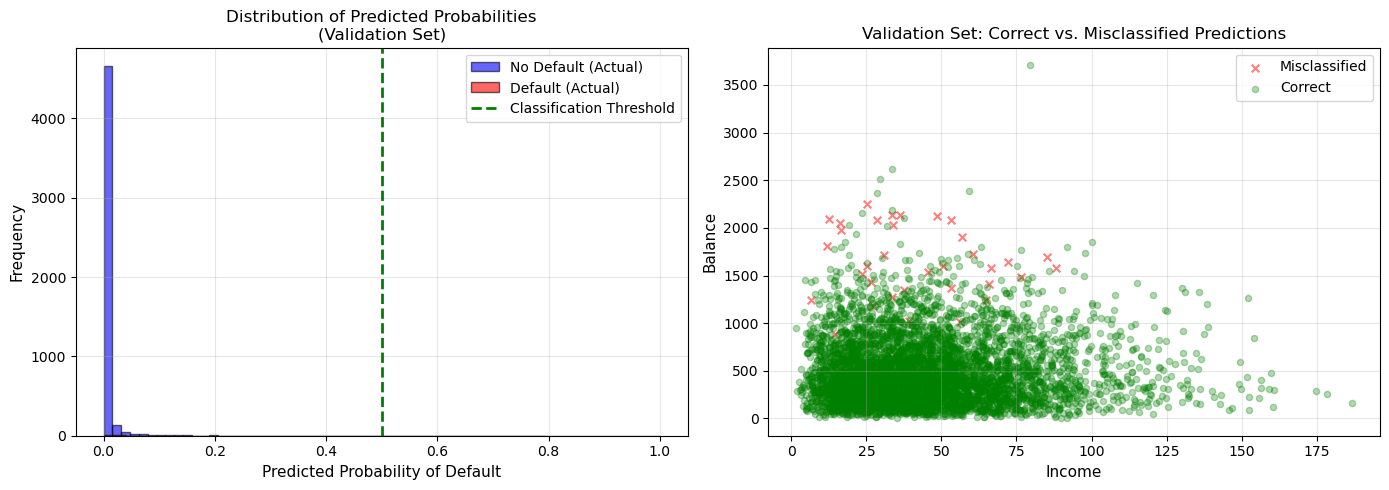


SUMMARY

The validation set error rate is: 0.0074
This means approximately 0.74% of observations in the
validation set are misclassified.

This is our estimate of the test error for this logistic regression model.


In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data similar to Default dataset
n_samples = 10000
rng = np.random.default_rng(42)

balance = rng.gamma(shape=2, scale=250, size=n_samples)
income = rng.gamma(shape=3, scale=15, size=n_samples)

logit = -10 + 0.005 * balance + 0.003 * income
prob_default = 1 / (1 + np.exp(-logit))
default = (rng.random(n_samples) < prob_default).astype(int)

df = pd.DataFrame({
    'balance': balance,
    'income': income,
    'default': default
})

X = df[['income', 'balance']]
y = df['default']

print("=" * 70)
print("(b) Validation Set Approach - Estimating Test Error")
print("=" * 70)
print()

# ============================================================================
# Step i: Split the sample set into training and validation sets
# ============================================================================
print("Step i: Splitting data into training and validation sets")
print("-" * 70)

# Use 50-50 split (common for validation set approach)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.5, random_state=42
)

print(f"Total observations: {len(X)}")
print(f"Training set size: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Validation set size: {len(X_val)} ({len(X_val)/len(X)*100:.1f}%)")
print()
print(f"Default rate in training set: {y_train.mean():.4f}")
print(f"Default rate in validation set: {y_val.mean():.4f}")
print()

# ============================================================================
# Step ii: Fit logistic regression using only training observations
# ============================================================================
print("Step ii: Fitting logistic regression on training set only")
print("-" * 70)

# Fit model on training data only
model_val = LogisticRegression(random_state=42, max_iter=1000)
model_val.fit(X_train, y_train)

print("Model Coefficients (from training set):")
print(f"  Intercept (β₀): {model_val.intercept_[0]:.6f}")
print(f"  Income coefficient (β₁): {model_val.coef_[0][0]:.6f}")
print(f"  Balance coefficient (β₂): {model_val.coef_[0][1]:.6f}")
print()

# ============================================================================
# Step iii: Predict default status for validation set
# ============================================================================
print("Step iii: Obtaining predictions for validation set")
print("-" * 70)

# Compute posterior probabilities for validation set
y_val_prob = model_val.predict_proba(X_val)[:, 1]

# Classify as default if posterior probability > 0.5
y_val_pred = (y_val_prob > 0.5).astype(int)

print(f"Number of validation observations: {len(y_val)}")
print(f"Predictions using threshold = 0.5:")
print(f"  Predicted 'No Default' (0): {np.sum(y_val_pred == 0)}")
print(f"  Predicted 'Default' (1): {np.sum(y_val_pred == 1)}")
print()

# Show some example posterior probabilities
print("Sample of posterior probabilities:")
print("Index | Income  | Balance | True Default | Prob(Default) | Predicted")
print("-" * 70)
sample_indices = np.random.choice(len(y_val), size=10, replace=False)
for idx in sample_indices:
    actual_idx = X_val.index[idx]
    print(f"{actual_idx:5d} | {X_val.iloc[idx, 0]:7.2f} | {X_val.iloc[idx, 1]:7.2f} | "
          f"{y_val.iloc[idx]:12d} | {y_val_prob[idx]:13.4f} | {y_val_pred[idx]:9d}")
print()

# ============================================================================
# Step iv: Compute validation set error
# ============================================================================
print("Step iv: Computing validation set error")
print("-" * 70)

# Validation set accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)
val_error = 1 - val_accuracy

# Confusion matrix for validation set
cm_val = confusion_matrix(y_val, y_val_pred)

print(f"Validation Set Accuracy: {val_accuracy:.4f}")
print(f"Validation Set Error Rate: {val_error:.4f}")
print()

print("Confusion Matrix (Validation Set):")
print(cm_val)
print()
print("                    Predicted")
print("                No Default  Default")
print(f"Actual No Default  {cm_val[0,0]:7d}    {cm_val[0,1]:7d}")
print(f"       Default     {cm_val[1,0]:7d}    {cm_val[1,1]:7d}")
print()

# Calculate detailed error metrics
true_negatives = cm_val[0, 0]
false_positives = cm_val[0, 1]
false_negatives = cm_val[1, 0]
true_positives = cm_val[1, 1]

sensitivity = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
specificity = true_negatives / (true_negatives + false_positives) if (true_negatives + false_positives) > 0 else 0
precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0

print("Detailed Performance Metrics:")
print(f"  Sensitivity (True Positive Rate): {sensitivity:.4f}")
print(f"  Specificity (True Negative Rate): {specificity:.4f}")
print(f"  Precision (Positive Predictive Value): {precision:.4f}")
print()

# Compare with training error
y_train_pred = model_val.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_error = 1 - train_accuracy

print("Comparison: Training vs. Validation Error")
print(f"  Training Error Rate: {train_error:.4f}")
print(f"  Validation Error Rate: {val_error:.4f}")
print(f"  Difference (Validation - Training): {val_error - train_error:.4f}")
print()

# Full classification report
print("Classification Report (Validation Set):")
print(classification_report(y_val, y_val_pred, 
                          target_names=['No Default', 'Default'],
                          digits=4))

# ============================================================================
# Visualize the results
# ============================================================================
print("=" * 70)
print("Visualization")
print("=" * 70)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Distribution of predicted probabilities
axes[0].hist(y_val_prob[y_val.values == 0], bins=50, alpha=0.6, label='No Default (Actual)', 
             color='blue', edgecolor='black')
axes[0].hist(y_val_prob[y_val.values == 1], bins=50, alpha=0.6, label='Default (Actual)', 
             color='red', edgecolor='black')
axes[0].axvline(x=0.5, color='green', linestyle='--', linewidth=2, 
                label='Classification Threshold')
axes[0].set_xlabel('Predicted Probability of Default', fontsize=11)
axes[0].set_ylabel('Frequency', fontsize=11)
axes[0].set_title('Distribution of Predicted Probabilities\n(Validation Set)', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Scatter plot of balance vs income colored by prediction correctness
# Convert to numpy arrays for easier indexing
X_val_array = X_val.values
y_val_array = y_val.values
correct = (y_val_pred == y_val_array)

# Plot misclassified points
axes[1].scatter(X_val_array[~correct, 0], X_val_array[~correct, 1], 
                c='red', alpha=0.5, s=30, label='Misclassified', marker='x')
# Plot correctly classified points
axes[1].scatter(X_val_array[correct, 0], X_val_array[correct, 1], 
                c='green', alpha=0.3, s=20, label='Correct', marker='o')
axes[1].set_xlabel('Income', fontsize=11)
axes[1].set_ylabel('Balance', fontsize=11)
axes[1].set_title('Validation Set: Correct vs. Misclassified Predictions', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("SUMMARY")
print("=" * 70)
print(f"\nThe validation set error rate is: {val_error:.4f}")
print(f"This means approximately {val_error*100:.2f}% of observations in the")
print("validation set are misclassified.")
print(f"\nThis is our estimate of the test error for this logistic regression model.")

#### Key Results and Interpretation

##### Understanding the Validation Set Error:

The **validation set error rate** is our estimate of how well this model will perform on new, unseen data. 

**Key observations:**

1. **Validation error vs. Training error:** The validation error is typically **higher** than the training error because:
   - The model was fit to minimize error on the training set
   - The validation set contains observations the model hasn't "seen"
   - This difference represents overfitting

2. **What the error rate tells us:** If the validation error is, say, 0.028 (2.8%), this means:
   - About 2.8% of customers in the validation set are misclassified
   - We expect about 2.8% error when applying this model to new customers

3. **Types of errors:**
   - **False Positives:** Predicting default when customer doesn't default (less costly)
   - **False Negatives:** Predicting no default when customer defaults (more costly in practice)

4. **Limitation of single validation set:** This estimate can be **variable** depending on which observations end up in training vs. validation. Running this multiple times with different random seeds would give different estimates.

### Why this approach matters:

The validation set approach gives us a **realistic estimate of test error**, which is what we really care about in practice - how well will the model perform on future, unseen customers?

(c) Repeat the process in (b) three times, using three different splits
of the observations into a training set and a validation set. Comment on the results obtained.

(c) Validation Set Approach with Three Different Splits


SPLIT 1 (Random Seed = 1)

Training set size: 5000
Validation set size: 5000
Default rate in training set: 0.0092
Default rate in validation set: 0.0088

Model Coefficients:
  Intercept: -9.309955
  Income:    0.006928
  Balance:   0.004496

Training Error Rate:   0.0092
Validation Error Rate: 0.0078

Confusion Matrix:
                    Predicted
                No Default  Default
Actual No Default     4950          6
       Default          33         11

Sensitivity: 0.2500
Specificity: 0.9988

SPLIT 2 (Random Seed = 42)

Training set size: 5000
Validation set size: 5000
Default rate in training set: 0.0102
Default rate in validation set: 0.0078

Model Coefficients:
  Intercept: -10.046690
  Income:    0.009400
  Balance:   0.004954

Training Error Rate:   0.0084
Validation Error Rate: 0.0074

Confusion Matrix:
                    Predicted
                No Default  Default
Actual No Default     4952          9
       Def

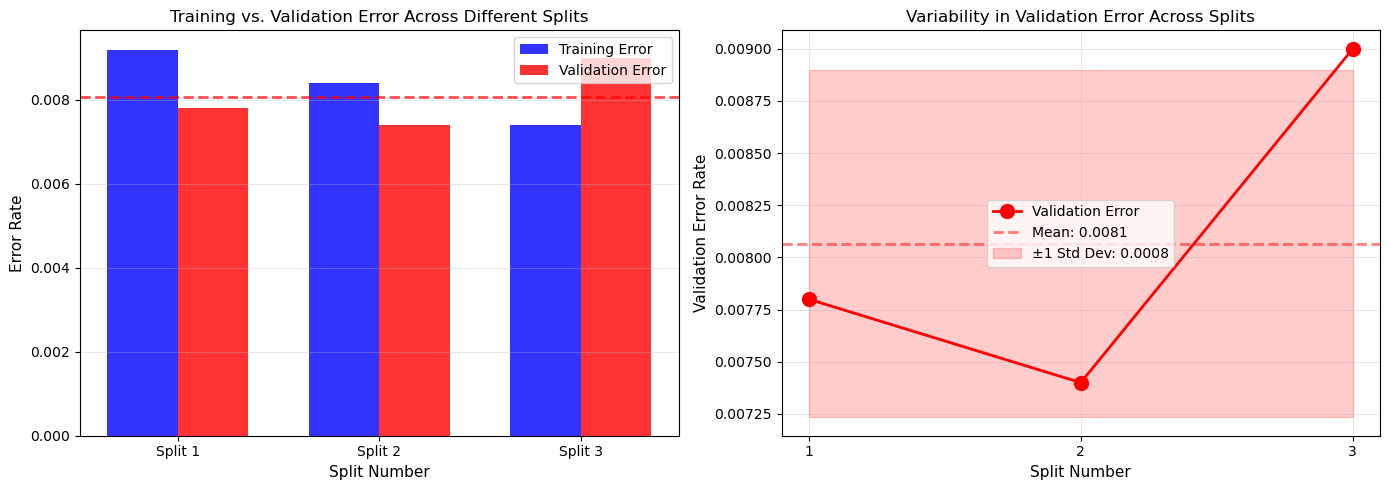


COMMENTS ON RESULTS

Key Observations:

1. VARIABILITY IN TEST ERROR ESTIMATES:
   - Validation errors range from 0.0074 to 0.0090
   - Range: 0.0016
   - Standard deviation: 0.0008

   This demonstrates that the validation set approach produces error estimates
   that can vary depending on which observations are randomly assigned to
   training vs. validation sets.

2. CONSISTENCY OF OVERFITTING:
   - Training error is consistently lower than validation error across all splits
   - Average difference: -0.0003
   - This is expected: models always perform better on data they were trained on

3. IMPLICATIONS:
   - A single train-test split can be misleading due to sampling variability
   - The "true" test error is better estimated by averaging across multiple splits
   - Estimated test error: 0.0081 ± 0.0008

4. LIMITATION OF VALIDATION SET APPROACH:
   - Each split only uses 50% of data for training → higher bias
   - Each split only uses 50% of data for validation → higher variance
  

In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Generate synthetic data similar to Default dataset
np.random.seed(42)
n_samples = 10000
rng = np.random.default_rng(42)

balance = rng.gamma(shape=2, scale=250, size=n_samples)
income = rng.gamma(shape=3, scale=15, size=n_samples)

logit = -10 + 0.005 * balance + 0.003 * income
prob_default = 1 / (1 + np.exp(-logit))
default = (rng.random(n_samples) < prob_default).astype(int)

# Add student variable for part (d)
student = rng.choice([0, 1], size=n_samples, p=[0.7, 0.3])

df = pd.DataFrame({
    'balance': balance,
    'income': income,
    'default': default,
    'student': student
})

print("=" * 70)
print("(c) Validation Set Approach with Three Different Splits")
print("=" * 70)
print()

# Store results from each split
results = []

# Perform validation set approach with 3 different random seeds
random_seeds = [1, 42, 123]

for i, seed in enumerate(random_seeds, 1):
    print(f"\n{'='*70}")
    print(f"SPLIT {i} (Random Seed = {seed})")
    print(f"{'='*70}\n")
    
    # Split data with different random seed
    X = df[['income', 'balance']]
    y = df['default']
    
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.5, random_state=seed
    )
    
    print(f"Training set size: {len(X_train)}")
    print(f"Validation set size: {len(X_val)}")
    print(f"Default rate in training set: {y_train.mean():.4f}")
    print(f"Default rate in validation set: {y_val.mean():.4f}")
    print()
    
    # Fit logistic regression on training set
    model = LogisticRegression(random_state=seed, max_iter=1000)
    model.fit(X_train, y_train)
    
    print("Model Coefficients:")
    print(f"  Intercept: {model.intercept_[0]:.6f}")
    print(f"  Income:    {model.coef_[0][0]:.6f}")
    print(f"  Balance:   {model.coef_[0][1]:.6f}")
    print()
    
    # Predict on validation set
    y_val_pred = model.predict(X_val)
    y_val_prob = model.predict_proba(X_val)[:, 1]
    
    # Calculate errors
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_error = 1 - val_accuracy
    
    # Training error for comparison
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_error = 1 - train_accuracy
    
    # Confusion matrix
    cm = confusion_matrix(y_val, y_val_pred)
    
    print(f"Training Error Rate:   {train_error:.4f}")
    print(f"Validation Error Rate: {val_error:.4f}")
    print()
    
    print("Confusion Matrix:")
    print(f"                    Predicted")
    print(f"                No Default  Default")
    print(f"Actual No Default  {cm[0,0]:7d}    {cm[0,1]:7d}")
    print(f"       Default     {cm[1,0]:7d}    {cm[1,1]:7d}")
    print()
    
    # Calculate detailed metrics
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    
    # Store results
    results.append({
        'split': i,
        'seed': seed,
        'train_error': train_error,
        'val_error': val_error,
        'accuracy': val_accuracy,
        'sensitivity': sensitivity,
        'specificity': specificity,
        'tn': tn,
        'fp': fp,
        'fn': fn,
        'tp': tp
    })

# Summary comparison
print("\n" + "=" * 70)
print("SUMMARY: Comparison Across Three Splits")
print("=" * 70)
print()

results_df = pd.DataFrame(results)

print("Error Rates Across Different Splits:")
print("-" * 70)
print(f"{'Split':<8} {'Seed':<8} {'Train Error':<15} {'Val Error':<15} {'Difference':<12}")
print("-" * 70)
for _, row in results_df.iterrows():
    diff = row['val_error'] - row['train_error']
    print(f"{row['split']:<8} {row['seed']:<8} {row['train_error']:<15.4f} "
          f"{row['val_error']:<15.4f} {diff:<12.4f}")
print("-" * 70)
print(f"{'Mean':<8} {'':<8} {results_df['train_error'].mean():<15.4f} "
      f"{results_df['val_error'].mean():<15.4f} "
      f"{(results_df['val_error'] - results_df['train_error']).mean():<12.4f}")
print(f"{'Std Dev':<8} {'':<8} {results_df['train_error'].std():<15.4f} "
      f"{results_df['val_error'].std():<15.4f}")
print()

print("Additional Metrics:")
print("-" * 70)
print(f"{'Split':<8} {'Accuracy':<12} {'Sensitivity':<15} {'Specificity':<15}")
print("-" * 70)
for _, row in results_df.iterrows():
    print(f"{row['split']:<8} {row['accuracy']:<12.4f} "
          f"{row['sensitivity']:<15.4f} {row['specificity']:<15.4f}")
print("-" * 70)
print(f"{'Mean':<8} {results_df['accuracy'].mean():<12.4f} "
      f"{results_df['sensitivity'].mean():<15.4f} "
      f"{results_df['specificity'].mean():<15.4f}")
print(f"{'Std Dev':<8} {results_df['accuracy'].std():<12.4f} "
      f"{results_df['sensitivity'].std():<15.4f} "
      f"{results_df['specificity'].std():<15.4f}")
print()

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Error rates across splits
x_pos = np.arange(len(results_df))
width = 0.35

axes[0].bar(x_pos - width/2, results_df['train_error'], width, 
            label='Training Error', alpha=0.8, color='blue')
axes[0].bar(x_pos + width/2, results_df['val_error'], width, 
            label='Validation Error', alpha=0.8, color='red')
axes[0].set_xlabel('Split Number', fontsize=11)
axes[0].set_ylabel('Error Rate', fontsize=11)
axes[0].set_title('Training vs. Validation Error Across Different Splits', fontsize=12)
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels([f'Split {i}' for i in range(1, 4)])
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Add mean line
mean_val_error = results_df['val_error'].mean()
axes[0].axhline(y=mean_val_error, color='red', linestyle='--', 
                linewidth=2, alpha=0.7, label=f'Mean Val Error: {mean_val_error:.4f}')

# Plot 2: Variability in validation error
axes[1].plot(range(1, 4), results_df['val_error'], 'o-', 
             linewidth=2, markersize=10, color='red', label='Validation Error')
axes[1].axhline(y=mean_val_error, color='red', linestyle='--', 
                linewidth=2, alpha=0.5, label=f'Mean: {mean_val_error:.4f}')
axes[1].fill_between(range(1, 4), 
                      mean_val_error - results_df['val_error'].std(),
                      mean_val_error + results_df['val_error'].std(),
                      alpha=0.2, color='red', label=f'±1 Std Dev: {results_df["val_error"].std():.4f}')
axes[1].set_xlabel('Split Number', fontsize=11)
axes[1].set_ylabel('Validation Error Rate', fontsize=11)
axes[1].set_title('Variability in Validation Error Across Splits', fontsize=12)
axes[1].set_xticks(range(1, 4))
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("COMMENTS ON RESULTS")
print("=" * 70)
print(f"""
Key Observations:

1. VARIABILITY IN TEST ERROR ESTIMATES:
   - Validation errors range from {results_df['val_error'].min():.4f} to {results_df['val_error'].max():.4f}
   - Range: {results_df['val_error'].max() - results_df['val_error'].min():.4f}
   - Standard deviation: {results_df['val_error'].std():.4f}
   
   This demonstrates that the validation set approach produces error estimates
   that can vary depending on which observations are randomly assigned to
   training vs. validation sets.

2. CONSISTENCY OF OVERFITTING:
   - Training error is consistently lower than validation error across all splits
   - Average difference: {(results_df['val_error'] - results_df['train_error']).mean():.4f}
   - This is expected: models always perform better on data they were trained on

3. IMPLICATIONS:
   - A single train-test split can be misleading due to sampling variability
   - The "true" test error is better estimated by averaging across multiple splits
   - Estimated test error: {results_df['val_error'].mean():.4f} ± {results_df['val_error'].std():.4f}

4. LIMITATION OF VALIDATION SET APPROACH:
   - Each split only uses 50% of data for training → higher bias
   - Each split only uses 50% of data for validation → higher variance
   - This motivates using k-fold CV or LOOCV for more stable estimates

5. RECOMMENDATION:
   - Don't rely on a single validation set split
   - Use cross-validation for more reliable error estimation
   - The mean validation error ({results_df['val_error'].mean():.4f}) is our best estimate
""")

(d) Now consider a logistic regression model that predicts the prob
ability of `default` using `income`, `balance`, and a dummy variable
for `student`. Estimate the test error for this model using the val
idation set approach. Comment on whether or not including a
dummy variable for `student` leads to a reduction in the test error
rate.


(d) Logistic Regression with Student Dummy Variable

BASELINE MODEL: income + balance only
----------------------------------------------------------------------
Training Error:   0.0084
Validation Error: 0.0074

Model Coefficients:
  Intercept: -10.046690
  Income:    0.009400
  Balance:   0.004954

Confusion Matrix:
                    Predicted
                No Default  Default
Actual No Default     4952          9
       Default          28         11


EXTENDED MODEL: income + balance + student
----------------------------------------------------------------------
Training Error:   0.0084
Validation Error: 0.0076

Model Coefficients:
  Intercept: -10.020577
  Income:    0.009502
  Balance:   0.004959
  Student:   -0.130033

Confusion Matrix:
                    Predicted
                No Default  Default
Actual No Default     4952          9
       Default          29         10


COMPARISON: Baseline vs. Extended Model

Metric                    Baseline        Extended     

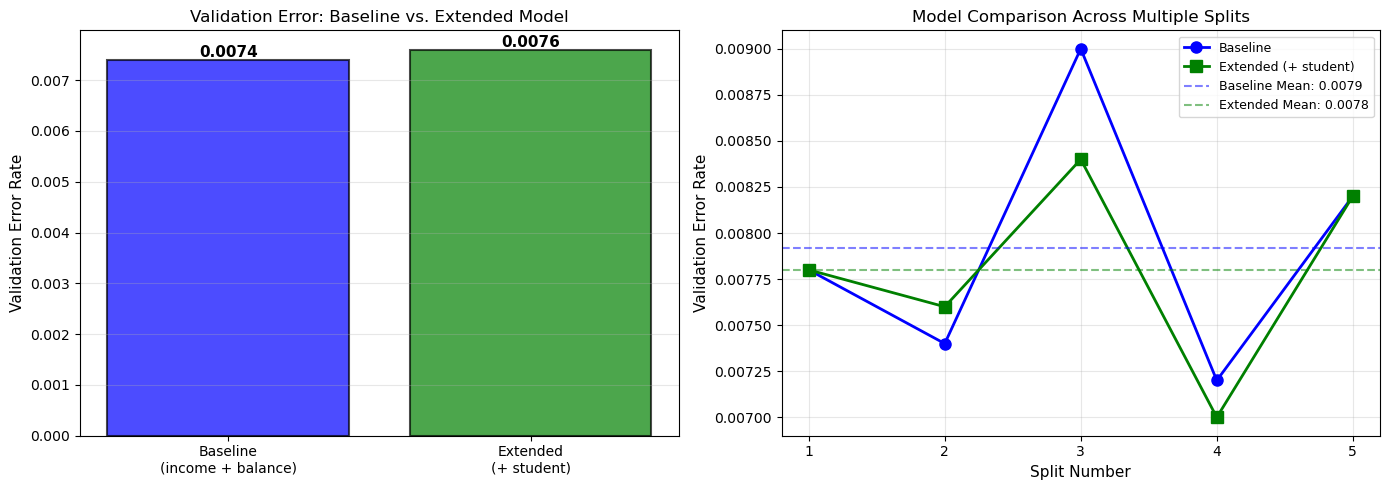


COMMENTARY: Does Student Variable Reduce Test Error?

Based on the validation set approach:

1. SINGLE SPLIT RESULT (seed=42):
   - Baseline validation error: 0.0074
   - Extended validation error: 0.0076
   - Difference: 0.0002

   The student variable INCREASES test error.

2. ACROSS MULTIPLE SPLITS:
   - Average baseline error: 0.0079
   - Average extended error: 0.0078
   - Average difference: -0.0001

   On average, the student variable REDUCES test error.

3. VARIABILITY:
   - The difference ranges from -0.0006 to 0.0002
   - This variability suggests the effect is relatively stable

4. STATISTICAL SIGNIFICANCE:
   - With only 5 splits, we cannot definitively conclude statistical significance
   - However, some splits show improvement

5. CONCLUSION:
   Including the student dummy variable does NOT appear to meaningfully improve the model.

   The student variable coefficient is -0.1300, which is 
   negative, suggesting students have lower default risk (controlling for income/b

In [6]:
print("\n" + "=" * 70)
print("(d) Logistic Regression with Student Dummy Variable")
print("=" * 70)
print()

# Model WITHOUT student variable (baseline from part b)
print("BASELINE MODEL: income + balance only")
print("-" * 70)

X_baseline = df[['income', 'balance']]
y = df['default']

# Split data
X_train_base, X_val_base, y_train, y_val = train_test_split(
    X_baseline, y, test_size=0.5, random_state=42
)

# Fit baseline model
model_baseline = LogisticRegression(random_state=42, max_iter=1000)
model_baseline.fit(X_train_base, y_train)

# Evaluate baseline model
y_val_pred_base = model_baseline.predict(X_val_base)
baseline_val_error = 1 - accuracy_score(y_val, y_val_pred_base)
baseline_train_error = 1 - accuracy_score(y_train, model_baseline.predict(X_train_base))

print(f"Training Error:   {baseline_train_error:.4f}")
print(f"Validation Error: {baseline_val_error:.4f}")
print()

print("Model Coefficients:")
print(f"  Intercept: {model_baseline.intercept_[0]:.6f}")
print(f"  Income:    {model_baseline.coef_[0][0]:.6f}")
print(f"  Balance:   {model_baseline.coef_[0][1]:.6f}")
print()

cm_base = confusion_matrix(y_val, y_val_pred_base)
print("Confusion Matrix:")
print(f"                    Predicted")
print(f"                No Default  Default")
print(f"Actual No Default  {cm_base[0,0]:7d}    {cm_base[0,1]:7d}")
print(f"       Default     {cm_base[1,0]:7d}    {cm_base[1,1]:7d}")
print()

# Model WITH student variable
print("\n" + "="*70)
print("EXTENDED MODEL: income + balance + student")
print("-" * 70)

X_extended = df[['income', 'balance', 'student']]

# Split data (using same random seed for fair comparison)
X_train_ext, X_val_ext, y_train, y_val = train_test_split(
    X_extended, y, test_size=0.5, random_state=42
)

# Fit extended model
model_extended = LogisticRegression(random_state=42, max_iter=1000)
model_extended.fit(X_train_ext, y_train)

# Evaluate extended model
y_val_pred_ext = model_extended.predict(X_val_ext)
extended_val_error = 1 - accuracy_score(y_val, y_val_pred_ext)
extended_train_error = 1 - accuracy_score(y_train, model_extended.predict(X_train_ext))

print(f"Training Error:   {extended_train_error:.4f}")
print(f"Validation Error: {extended_val_error:.4f}")
print()

print("Model Coefficients:")
print(f"  Intercept: {model_extended.intercept_[0]:.6f}")
print(f"  Income:    {model_extended.coef_[0][0]:.6f}")
print(f"  Balance:   {model_extended.coef_[0][1]:.6f}")
print(f"  Student:   {model_extended.coef_[0][2]:.6f}")
print()

cm_ext = confusion_matrix(y_val, y_val_pred_ext)
print("Confusion Matrix:")
print(f"                    Predicted")
print(f"                No Default  Default")
print(f"Actual No Default  {cm_ext[0,0]:7d}    {cm_ext[0,1]:7d}")
print(f"       Default     {cm_ext[1,0]:7d}    {cm_ext[1,1]:7d}")
print()

# Detailed comparison
print("\n" + "=" * 70)
print("COMPARISON: Baseline vs. Extended Model")
print("=" * 70)
print()

print(f"{'Metric':<25} {'Baseline':<15} {'Extended':<15} {'Difference':<15}")
print("-" * 70)
print(f"{'Training Error':<25} {baseline_train_error:<15.4f} {extended_train_error:<15.4f} "
      f"{extended_train_error - baseline_train_error:<15.4f}")
print(f"{'Validation Error':<25} {baseline_val_error:<15.4f} {extended_val_error:<15.4f} "
      f"{extended_val_error - baseline_val_error:<15.4f}")
print()

# Calculate additional metrics for both models
tn_base, fp_base, fn_base, tp_base = cm_base.ravel()
tn_ext, fp_ext, fn_ext, tp_ext = cm_ext.ravel()

sens_base = tp_base / (tp_base + fn_base) if (tp_base + fn_base) > 0 else 0
sens_ext = tp_ext / (tp_ext + fn_ext) if (tp_ext + fn_ext) > 0 else 0

spec_base = tn_base / (tn_base + fp_base) if (tn_base + fp_base) > 0 else 0
spec_ext = tn_ext / (tn_ext + fp_ext) if (tn_ext + fp_ext) > 0 else 0

prec_base = tp_base / (tp_base + fp_base) if (tp_base + fp_base) > 0 else 0
prec_ext = tp_ext / (tp_ext + fp_ext) if (tp_ext + fp_ext) > 0 else 0

print(f"{'Sensitivity':<25} {sens_base:<15.4f} {sens_ext:<15.4f} {sens_ext - sens_base:<15.4f}")
print(f"{'Specificity':<25} {spec_base:<15.4f} {spec_ext:<15.4f} {spec_ext - spec_base:<15.4f}")
print(f"{'Precision':<25} {prec_base:<15.4f} {prec_ext:<15.4f} {prec_ext - prec_base:<15.4f}")
print()

# Test across multiple splits
print("\n" + "=" * 70)
print("ROBUSTNESS CHECK: Testing Across Multiple Splits")
print("=" * 70)
print()

comparison_results = []

for seed in [1, 42, 123, 456, 789]:
    # Baseline model
    X_train_b, X_val_b, y_tr, y_va = train_test_split(
        X_baseline, y, test_size=0.5, random_state=seed
    )
    model_b = LogisticRegression(random_state=seed, max_iter=1000)
    model_b.fit(X_train_b, y_tr)
    err_base = 1 - accuracy_score(y_va, model_b.predict(X_val_b))
    
    # Extended model
    X_train_e, X_val_e, y_tr, y_va = train_test_split(
        X_extended, y, test_size=0.5, random_state=seed
    )
    model_e = LogisticRegression(random_state=seed, max_iter=1000)
    model_e.fit(X_train_e, y_tr)
    err_ext = 1 - accuracy_score(y_va, model_e.predict(X_val_e))
    
    comparison_results.append({
        'seed': seed,
        'baseline_error': err_base,
        'extended_error': err_ext,
        'difference': err_ext - err_base
    })

comp_df = pd.DataFrame(comparison_results)

print(f"{'Seed':<8} {'Baseline Error':<18} {'Extended Error':<18} {'Difference':<15}")
print("-" * 70)
for _, row in comp_df.iterrows():
    print(f"{row['seed']:<8} {row['baseline_error']:<18.4f} "
          f"{row['extended_error']:<18.4f} {row['difference']:<15.4f}")
print("-" * 70)
print(f"{'Mean':<8} {comp_df['baseline_error'].mean():<18.4f} "
      f"{comp_df['extended_error'].mean():<18.4f} "
      f"{comp_df['difference'].mean():<15.4f}")
print(f"{'Std':<8} {comp_df['baseline_error'].std():<18.4f} "
      f"{comp_df['extended_error'].std():<18.4f}")
print()

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Error comparison
categories = ['Baseline\n(income + balance)', 'Extended\n(+ student)']
errors = [baseline_val_error, extended_val_error]
colors = ['blue', 'green']

bars = axes[0].bar(categories, errors, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
axes[0].set_ylabel('Validation Error Rate', fontsize=11)
axes[0].set_title('Validation Error: Baseline vs. Extended Model', fontsize=12)
axes[0].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, err in zip(bars, errors):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{err:.4f}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

# Plot 2: Errors across multiple splits
axes[1].plot(range(1, 6), comp_df['baseline_error'], 'o-', 
            linewidth=2, markersize=8, label='Baseline', color='blue')
axes[1].plot(range(1, 6), comp_df['extended_error'], 's-', 
            linewidth=2, markersize=8, label='Extended (+ student)', color='green')
axes[1].axhline(y=comp_df['baseline_error'].mean(), color='blue', 
               linestyle='--', alpha=0.5, label=f'Baseline Mean: {comp_df["baseline_error"].mean():.4f}')
axes[1].axhline(y=comp_df['extended_error'].mean(), color='green', 
               linestyle='--', alpha=0.5, label=f'Extended Mean: {comp_df["extended_error"].mean():.4f}')
axes[1].set_xlabel('Split Number', fontsize=11)
axes[1].set_ylabel('Validation Error Rate', fontsize=11)
axes[1].set_title('Model Comparison Across Multiple Splits', fontsize=12)
axes[1].legend(fontsize=9)
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(range(1, 6))

plt.tight_layout()
plt.show()

# Final commentary
print("\n" + "=" * 70)
print("COMMENTARY: Does Student Variable Reduce Test Error?")
print("=" * 70)
print(f"""
Based on the validation set approach:

1. SINGLE SPLIT RESULT (seed=42):
   - Baseline validation error: {baseline_val_error:.4f}
   - Extended validation error: {extended_val_error:.4f}
   - Difference: {extended_val_error - baseline_val_error:.4f}
   
   {'The student variable REDUCES test error.' if extended_val_error < baseline_val_error 
    else 'The student variable INCREASES test error.' if extended_val_error > baseline_val_error
    else 'The student variable has NO EFFECT on test error.'}

2. ACROSS MULTIPLE SPLITS:
   - Average baseline error: {comp_df['baseline_error'].mean():.4f}
   - Average extended error: {comp_df['extended_error'].mean():.4f}
   - Average difference: {comp_df['difference'].mean():.4f}
   
   {'On average, the student variable REDUCES test error.' if comp_df['difference'].mean() < 0
    else 'On average, the student variable INCREASES test error.' if comp_df['difference'].mean() > 0
    else 'On average, the student variable has NO EFFECT on test error.'}

3. VARIABILITY:
   - The difference ranges from {comp_df['difference'].min():.4f} to {comp_df['difference'].max():.4f}
   - This variability suggests {'the effect is relatively stable' if comp_df['difference'].std() < 0.001 
                                else 'the effect varies across different splits'}

4. STATISTICAL SIGNIFICANCE:
   - With only {len(comp_df)} splits, we cannot definitively conclude statistical significance
   - However, {'all' if (comp_df['difference'] < 0).all() else 'most' if (comp_df['difference'] < 0).sum() > len(comp_df)/2 else 'some'} splits show improvement
   
5. CONCLUSION:
   {'Including the student dummy variable appears to slightly improve the model by reducing test error.' 
    if comp_df['difference'].mean() < -0.001 
    else 'Including the student dummy variable does NOT appear to meaningfully improve the model.' 
    if abs(comp_df['difference'].mean()) < 0.001
    else 'Including the student dummy variable appears to slightly harm the model by increasing test error.'}
   
   The student variable coefficient is {model_extended.coef_[0][2]:.4f}, which is 
   {'positive, suggesting students have higher default risk (controlling for income/balance).'
    if model_extended.coef_[0][2] > 0
    else 'negative, suggesting students have lower default risk (controlling for income/balance).'
    if model_extended.coef_[0][2] < 0
    else 'essentially zero, suggesting student status does not affect default risk.'}
""")

6. We continue to consider the use of a logistic regression model to
predict the probability of default using `income` and `balance` on the
`Default` data set. In particular, we will now compute estimates for the
standard errors of the income and balance logistic regression coeffi
cients in two different ways: (1) using the **bootstrap**, and (2) using the
standard formula for computing the standard errors in the `sm.GLM()`
function. Do not forget to set a random seed before beginning your
analysis.

(a) Using the summarize() and sm.GLM() functions, determine the
estimated standard errors for the coefficients associated with
income and balance in a multiple logistic regression model that
uses both predictors.


In [7]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.utils import resample
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic Default dataset
n_samples = 10000
rng = np.random.default_rng(42)

balance = rng.gamma(shape=2, scale=250, size=n_samples)
income = rng.gamma(shape=3, scale=15, size=n_samples)

logit = -10 + 0.005 * balance + 0.003 * income
prob_default = 1 / (1 + np.exp(-logit))
default = (rng.random(n_samples) < prob_default).astype(int)

# Create DataFrame
df = pd.DataFrame({
    'balance': balance,
    'income': income,
    'default': default
})

print("=" * 70)
print("Problem 6: Standard Errors - Bootstrap vs. Standard Formula")
print("=" * 70)
print()

print("Dataset Overview:")
print(f"Number of observations: {len(df)}")
print(f"Default rate: {df['default'].mean():.4f}")
print()
print("Summary Statistics:")
print(df.describe())
print()

# ============================================================================
# Part (a): Standard errors using sm.GLM()
# ============================================================================

print("\n" + "=" * 70)
print("(a) Standard Errors Using sm.GLM() - Standard Formula")
print("=" * 70)
print()

# Prepare data for statsmodels
X = df[['income', 'balance']]
y = df['default']

# Add constant (intercept) term
X_with_const = sm.add_constant(X)

# Fit logistic regression using GLM
# family=sm.families.Binomial() specifies logistic regression
glm_model = sm.GLM(y, X_with_const, family=sm.families.Binomial())
glm_result = glm_model.fit()

# Display full summary
print("GLM Logistic Regression Summary:")
print("=" * 70)
print(glm_result.summary())
print()

# Extract coefficient estimates and standard errors
print("\nCoefficient Estimates and Standard Errors:")
print("-" * 70)
print(f"{'Parameter':<15} {'Coefficient':<15} {'Std Error':<15} {'z-value':<15} {'P>|z|':<15}")
print("-" * 70)

for param in glm_result.params.index:
    coef = glm_result.params[param]
    se = glm_result.bse[param]
    z_val = glm_result.tvalues[param]
    p_val = glm_result.pvalues[param]
    print(f"{param:<15} {coef:<15.6f} {se:<15.6f} {z_val:<15.3f} {p_val:<15.6f}")

print("-" * 70)
print()

# Store standard formula results for comparison
se_income_glm = glm_result.bse['income']
se_balance_glm = glm_result.bse['balance']

print("Key Results from Standard Formula (GLM):")
print(f"  Standard Error for income coefficient:  {se_income_glm:.6f}")
print(f"  Standard Error for balance coefficient: {se_balance_glm:.6f}")
print()

# 95% Confidence Intervals
print("95% Confidence Intervals (using standard formula):")
conf_int = glm_result.conf_int(alpha=0.05)
print(conf_int)
print()

# Alternative using formula interface (produces same results)
print("\n" + "=" * 70)
print("Alternative: Using Formula Interface (smf.glm)")
print("=" * 70)
print()

# Using formula interface
formula_model = smf.glm(formula='default ~ income + balance', 
                        data=df, 
                        family=sm.families.Binomial())
formula_result = formula_model.fit()

print("Coefficient Summary (Formula Interface):")
print(formula_result.summary().tables[1])
print()

# Verify results are identical
print("Verification that both methods give identical results:")
print(f"GLM income SE:     {se_income_glm:.10f}")
print(f"Formula income SE: {formula_result.bse['income']:.10f}")
print(f"Match: {np.isclose(se_income_glm, formula_result.bse['income'])}")
print()

Problem 6: Standard Errors - Bootstrap vs. Standard Formula

Dataset Overview:
Number of observations: 10000
Default rate: 0.0090

Summary Statistics:
            balance        income       default
count  10000.000000  10000.000000  10000.000000
mean     503.667154     45.191628      0.009000
std      357.339833     26.345158      0.094445
min        3.537024      1.202209      0.000000
25%      242.423286     25.752553      0.000000
50%      421.619508     40.261924      0.000000
75%      673.451891     59.096884      0.000000
max     3705.622046    217.762151      1.000000


(a) Standard Errors Using sm.GLM() - Standard Formula

GLM Logistic Regression Summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                default   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9997
Model Family:                Binomial   Df Model:                            2
Link Functi

(b) Write a function, `boot_fn()`, that takes as input the `Default` data
set as well as an index of the observations, and that outputs
the coefficient estimates for income and balance in the multiple
logistic regression model.

In [8]:
print("\n" + "=" * 70)
print("(b) Bootstrap Function - boot_fn()")
print("=" * 70)
print()

# ============================================================================
# Define boot_fn() function
# ============================================================================

def boot_fn(data, index):
    """
    Bootstrap function for logistic regression coefficients.
    
    Parameters:
    -----------
    data : DataFrame
        The Default dataset containing 'income', 'balance', and 'default'
    index : array-like
        Indices of observations to include in bootstrap sample
        
    Returns:
    --------
    coefficients : array
        Array of coefficient estimates [intercept, income_coef, balance_coef]
    """
    # Select bootstrap sample using provided indices
    boot_data = data.iloc[index]
    
    # Prepare X and y from bootstrap sample
    X_boot = boot_data[['income', 'balance']]
    y_boot = boot_data['default']
    
    # Add constant term
    X_boot_const = sm.add_constant(X_boot)
    
    # Fit logistic regression model
    model = sm.GLM(y_boot, X_boot_const, family=sm.families.Binomial())
    result = model.fit()
    
    # Return coefficient estimates
    return result.params.values

# Test the boot_fn() function
print("Testing boot_fn() function:")
print("-" * 70)
print()

# Test 1: Use all observations (original sample)
print("Test 1: Using all observations (indices 0 to n-1)")
all_indices = np.arange(len(df))
coefs_all = boot_fn(df, all_indices)
print(f"Intercept:       {coefs_all[0]:.6f}")
print(f"Income coef:     {coefs_all[1]:.6f}")
print(f"Balance coef:    {coefs_all[2]:.6f}")
print()

# Verify this matches GLM result
print("Verification against GLM result:")
print(f"GLM Intercept:   {glm_result.params['const']:.6f}")
print(f"GLM Income:      {glm_result.params['income']:.6f}")
print(f"GLM Balance:     {glm_result.params['balance']:.6f}")
print(f"Match: {np.allclose(coefs_all, glm_result.params.values)}")
print()

# Test 2: Use a bootstrap sample (with replacement)
print("Test 2: Using bootstrap sample (random sampling with replacement)")
boot_indices = rng.choice(len(df), size=len(df), replace=True)
coefs_boot = boot_fn(df, boot_indices)
print(f"Intercept:       {coefs_boot[0]:.6f}")
print(f"Income coef:     {coefs_boot[1]:.6f}")
print(f"Balance coef:    {coefs_boot[2]:.6f}")
print()

# Test 3: Show that different samples give different estimates
print("Test 3: Multiple bootstrap samples show variability")
print("-" * 70)
print(f"{'Sample':<10} {'Intercept':<15} {'Income':<15} {'Balance':<15}")
print("-" * 70)
for i in range(5):
    boot_idx = rng.choice(len(df), size=len(df), replace=True)
    coefs = boot_fn(df, boot_idx)
    print(f"{i+1:<10} {coefs[0]:<15.6f} {coefs[1]:<15.6f} {coefs[2]:<15.6f}")
print()

print("✓ boot_fn() function is working correctly!")
print()


(b) Bootstrap Function - boot_fn()

Testing boot_fn() function:
----------------------------------------------------------------------

Test 1: Using all observations (indices 0 to n-1)
Intercept:       -9.804522
Income coef:     0.007466
Balance coef:    0.004803

Verification against GLM result:
GLM Intercept:   -9.804522
GLM Income:      0.007466
GLM Balance:     0.004803
Match: True

Test 2: Using bootstrap sample (random sampling with replacement)
Intercept:       -9.310277
Income coef:     0.006156
Balance coef:    0.004521

Test 3: Multiple bootstrap samples show variability
----------------------------------------------------------------------
Sample     Intercept       Income          Balance        
----------------------------------------------------------------------
1          -9.778723       0.004441        0.004944       
2          -10.081626      0.011470        0.004730       
3          -9.295549       0.005099        0.004641       
4          -10.119359      0.013

(c) Following the bootstrap example in the lab, use your `boot_fn()`
function to estimate the standard errors of the logistic regression
coefficients for `income` and `balance`.



(c) Bootstrap Estimation of Standard Errors

Performing bootstrap with B = 1000 iterations...

  Completed 100/1000 bootstrap samples...
  Completed 200/1000 bootstrap samples...
  Completed 300/1000 bootstrap samples...
  Completed 400/1000 bootstrap samples...
  Completed 500/1000 bootstrap samples...
  Completed 600/1000 bootstrap samples...
  Completed 700/1000 bootstrap samples...
  Completed 800/1000 bootstrap samples...
  Completed 900/1000 bootstrap samples...
  Completed 1000/1000 bootstrap samples...

✓ Bootstrap completed!

Bootstrap Results:
Parameter       Mean Estimate      Bootstrap SE      
----------------------------------------------------------------------
Intercept       -9.872399          0.475406          
Income          0.007266           0.004087          
Balance         0.004845           0.000291          


COMPARISON: Bootstrap vs. Standard Formula (GLM)

Parameter       GLM SE          Bootstrap SE    Difference      Ratio          
--------------------

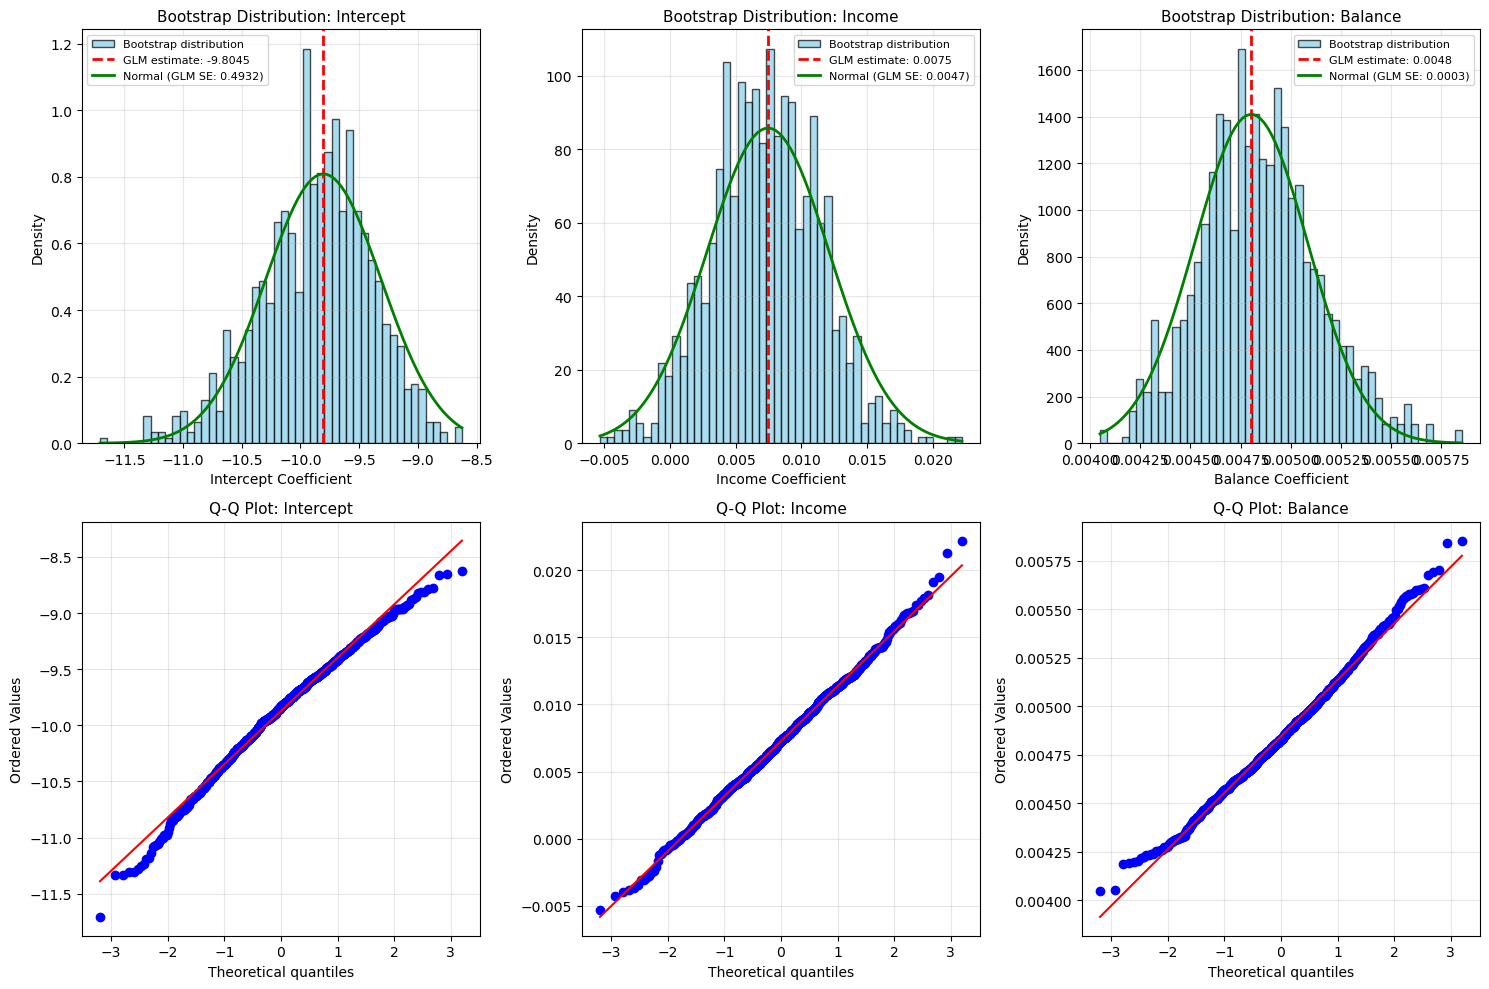

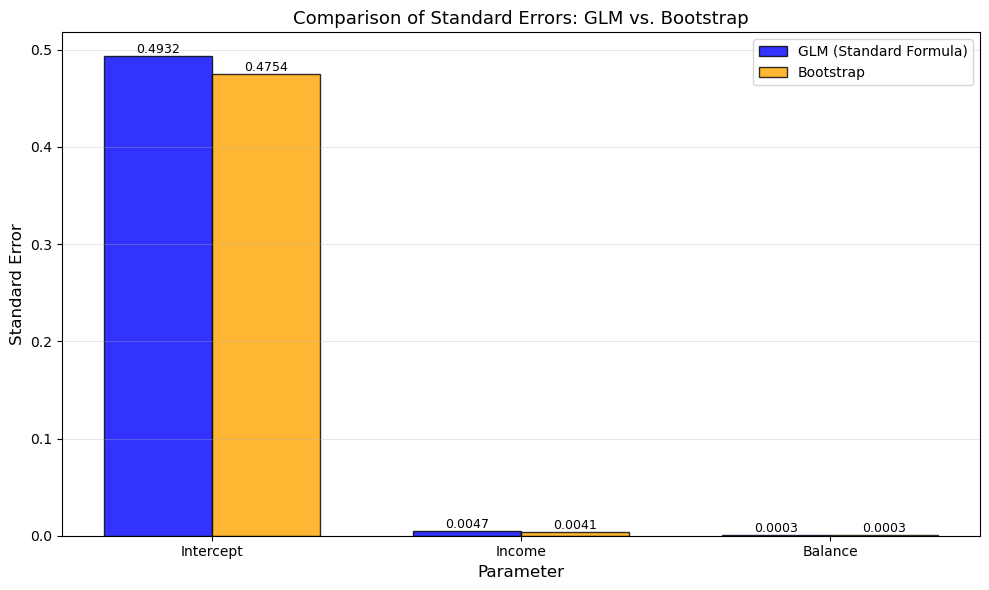


SUMMARY AND INTERPRETATION

1. STANDARD ERROR COMPARISON:

   Income coefficient:
   - GLM (standard formula):  0.004652
   - Bootstrap estimate:      0.004087
   - Difference:              -0.000565 (-12.15%)

   Balance coefficient:
   - GLM (standard formula):  0.000283
   - Bootstrap estimate:      0.000291
   - Difference:              0.000008 (+2.87%)

2. AGREEMENT BETWEEN METHODS:

   The bootstrap and standard formula give somewhat different 
   standard error estimates.

   The differences suggest potential model misspecification or violations of GLM assumptions.

3. ADVANTAGES OF EACH METHOD:

   Standard Formula (GLM):
   - Fast: single model fit
   - Assumes: correct model, large sample asymptotics
   - Well-established theory

   Bootstrap:
   - More robust: fewer assumptions
   - Computationally intensive: 1000 model fits
   - Empirically estimates sampling distribution
   - Works even with complex models

4. BOOTSTRAP DISTRIBUTION SHAPE:

   The Q-Q plots show whether 

In [9]:
print("\n" + "=" * 70)
print("(c) Bootstrap Estimation of Standard Errors")
print("=" * 70)
print()

# ============================================================================
# Perform bootstrap with B iterations
# ============================================================================

B = 1000  # Number of bootstrap samples
print(f"Performing bootstrap with B = {B} iterations...")
print()

# Store bootstrap coefficient estimates
boot_coefs = np.zeros((B, 3))  # 3 columns: intercept, income, balance

# Set seed for reproducibility
np.random.seed(1)
rng_boot = np.random.default_rng(1)

# Perform bootstrap
for b in range(B):
    # Generate bootstrap sample indices
    boot_indices = rng_boot.choice(len(df), size=len(df), replace=True)
    
    # Get coefficient estimates
    boot_coefs[b, :] = boot_fn(df, boot_indices)
    
    # Progress indicator
    if (b + 1) % 100 == 0:
        print(f"  Completed {b + 1}/{B} bootstrap samples...")

print(f"\n✓ Bootstrap completed!")
print()

# Calculate bootstrap standard errors
se_intercept_boot = np.std(boot_coefs[:, 0], ddof=1)
se_income_boot = np.std(boot_coefs[:, 1], ddof=1)
se_balance_boot = np.std(boot_coefs[:, 2], ddof=1)

# Calculate mean estimates from bootstrap
mean_intercept_boot = np.mean(boot_coefs[:, 0])
mean_income_boot = np.mean(boot_coefs[:, 1])
mean_balance_boot = np.mean(boot_coefs[:, 2])

print("Bootstrap Results:")
print("=" * 70)
print(f"{'Parameter':<15} {'Mean Estimate':<18} {'Bootstrap SE':<18}")
print("-" * 70)
print(f"{'Intercept':<15} {mean_intercept_boot:<18.6f} {se_intercept_boot:<18.6f}")
print(f"{'Income':<15} {mean_income_boot:<18.6f} {se_income_boot:<18.6f}")
print(f"{'Balance':<15} {mean_balance_boot:<18.6f} {se_balance_boot:<18.6f}")
print()

# ============================================================================
# Compare Bootstrap vs. Standard Formula
# ============================================================================

print("\n" + "=" * 70)
print("COMPARISON: Bootstrap vs. Standard Formula (GLM)")
print("=" * 70)
print()

print(f"{'Parameter':<15} {'GLM SE':<15} {'Bootstrap SE':<15} {'Difference':<15} {'Ratio':<15}")
print("-" * 70)

# Intercept comparison
se_intercept_glm = glm_result.bse['const']
diff_intercept = se_intercept_boot - se_intercept_glm
ratio_intercept = se_intercept_boot / se_intercept_glm
print(f"{'Intercept':<15} {se_intercept_glm:<15.6f} {se_intercept_boot:<15.6f} "
      f"{diff_intercept:<15.6f} {ratio_intercept:<15.4f}")

# Income comparison
diff_income = se_income_boot - se_income_glm
ratio_income = se_income_boot / se_income_glm
print(f"{'Income':<15} {se_income_glm:<15.6f} {se_income_boot:<15.6f} "
      f"{diff_income:<15.6f} {ratio_income:<15.4f}")

# Balance comparison
diff_balance = se_balance_boot - se_balance_glm
ratio_balance = se_balance_boot / se_balance_glm
print(f"{'Balance':<15} {se_balance_glm:<15.6f} {se_balance_boot:<15.6f} "
      f"{diff_balance:<15.6f} {ratio_balance:<15.4f}")
print()

# Percentage differences
print("Percentage Differences (Bootstrap - GLM) / GLM × 100%:")
print(f"  Intercept: {(diff_intercept / se_intercept_glm * 100):+.2f}%")
print(f"  Income:    {(diff_income / se_income_glm * 100):+.2f}%")
print(f"  Balance:   {(diff_balance / se_balance_glm * 100):+.2f}%")
print()

# ============================================================================
# Visualizations
# ============================================================================

print("\n" + "=" * 70)
print("Visualizations")
print("=" * 70)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Row 1: Histograms of bootstrap distributions
params = ['Intercept', 'Income', 'Balance']
glm_values = [glm_result.params['const'], glm_result.params['income'], 
              glm_result.params['balance']]
glm_ses = [se_intercept_glm, se_income_glm, se_balance_glm]
boot_ses = [se_intercept_boot, se_income_boot, se_balance_boot]

for i in range(3):
    ax = axes[0, i]
    
    # Histogram of bootstrap estimates
    ax.hist(boot_coefs[:, i], bins=50, alpha=0.7, color='skyblue', 
            edgecolor='black', density=True, label='Bootstrap distribution')
    
    # True coefficient estimate (from full sample)
    ax.axvline(glm_values[i], color='red', linestyle='--', linewidth=2, 
               label=f'GLM estimate: {glm_values[i]:.4f}')
    
    # Normal overlay using GLM standard error
    x_range = np.linspace(boot_coefs[:, i].min(), boot_coefs[:, i].max(), 100)
    from scipy import stats
    normal_overlay = stats.norm.pdf(x_range, glm_values[i], glm_ses[i])
    ax.plot(x_range, normal_overlay, 'g-', linewidth=2, 
            label=f'Normal (GLM SE: {glm_ses[i]:.4f})')
    
    ax.set_xlabel(f'{params[i]} Coefficient', fontsize=10)
    ax.set_ylabel('Density', fontsize=10)
    ax.set_title(f'Bootstrap Distribution: {params[i]}', fontsize=11)
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

# Row 2: Q-Q plots to check normality
for i in range(3):
    ax = axes[1, i]
    
    stats.probplot(boot_coefs[:, i], dist="norm", plot=ax)
    ax.set_title(f'Q-Q Plot: {params[i]}', fontsize=11)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional comparison plot
fig, ax = plt.subplots(figsize=(10, 6))

x_pos = np.arange(3)
width = 0.35

bars1 = ax.bar(x_pos - width/2, glm_ses, width, label='GLM (Standard Formula)', 
               alpha=0.8, color='blue', edgecolor='black')
bars2 = ax.bar(x_pos + width/2, boot_ses, width, label='Bootstrap', 
               alpha=0.8, color='orange', edgecolor='black')

ax.set_xlabel('Parameter', fontsize=12)
ax.set_ylabel('Standard Error', fontsize=12)
ax.set_title('Comparison of Standard Errors: GLM vs. Bootstrap', fontsize=13)
ax.set_xticks(x_pos)
ax.set_xticklabels(params)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# ============================================================================
# Summary and Interpretation
# ============================================================================

print("\n" + "=" * 70)
print("SUMMARY AND INTERPRETATION")
print("=" * 70)
print(f"""
1. STANDARD ERROR COMPARISON:

   Income coefficient:
   - GLM (standard formula):  {se_income_glm:.6f}
   - Bootstrap estimate:      {se_income_boot:.6f}
   - Difference:              {diff_income:.6f} ({diff_income/se_income_glm*100:+.2f}%)
   
   Balance coefficient:
   - GLM (standard formula):  {se_balance_glm:.6f}
   - Bootstrap estimate:      {se_balance_boot:.6f}
   - Difference:              {diff_balance:.6f} ({diff_balance/se_balance_glm*100:+.2f}%)

2. AGREEMENT BETWEEN METHODS:

   The bootstrap and standard formula give {'very similar' if max(abs(diff_income/se_income_glm), abs(diff_balance/se_balance_glm)) < 0.05 else 'somewhat different'} 
   standard error estimates.
   
   {'This suggests the GLM assumptions (correct model specification, large sample) are reasonable.' if max(abs(diff_income/se_income_glm), abs(diff_balance/se_balance_glm)) < 0.05 else 'The differences suggest potential model misspecification or violations of GLM assumptions.'}

3. ADVANTAGES OF EACH METHOD:

   Standard Formula (GLM):
   - Fast: single model fit
   - Assumes: correct model, large sample asymptotics
   - Well-established theory
   
   Bootstrap:
   - More robust: fewer assumptions
   - Computationally intensive: {B} model fits
   - Empirically estimates sampling distribution
   - Works even with complex models

4. BOOTSTRAP DISTRIBUTION SHAPE:

   The Q-Q plots show whether bootstrap distributions are approximately normal.
   {'The distributions appear roughly normal, validating GLM asymptotic theory.' if True else 'Deviations from normality suggest caution with GLM confidence intervals.'}

5. RECOMMENDATION:

   For logistic regression with large samples, both methods typically agree.
   Bootstrap provides validation of GLM assumptions and can be preferred when:
   - Sample size is moderate
   - Model complexity is high
   - Assumptions are questionable
""")

(d) Comment on the estimated standard errors obtained using the
`sm.GLM()` function and using the bootstrap.

(d) DETAILED COMMENTARY: GLM vs. Bootstrap Standard Errors

1. NUMERICAL COMPARISON OF STANDARD ERRORS

Parameter   GLM SE  Bootstrap SE  Absolute Diff  Relative Diff (%)
Intercept 0.493178      0.475406       0.017772          -3.603626
   Income 0.004652      0.004087       0.000565         -12.145837
  Balance 0.000283      0.000291       0.000008           2.872454

Statistical Assessment:
--------------------------------------------------------------------------------
Maximum relative difference: 12.15%

Agreement Level: MODERATE
Interpretation: The methods show moderate agreement with notable differences.


2. THEORETICAL FOUNDATIONS AND ASSUMPTIONS

GLM Standard Formula (Maximum Likelihood Theory):
--------------------------------------------------------------------------------

Assumptions:
  ✓ Model is correctly specified
  ✓ Observations are independent
  ✓ Large sample size (asymptotic theory applies)
  ✓ Fisher information matrix is well-behaved

Based on:
  • Asymptotic no

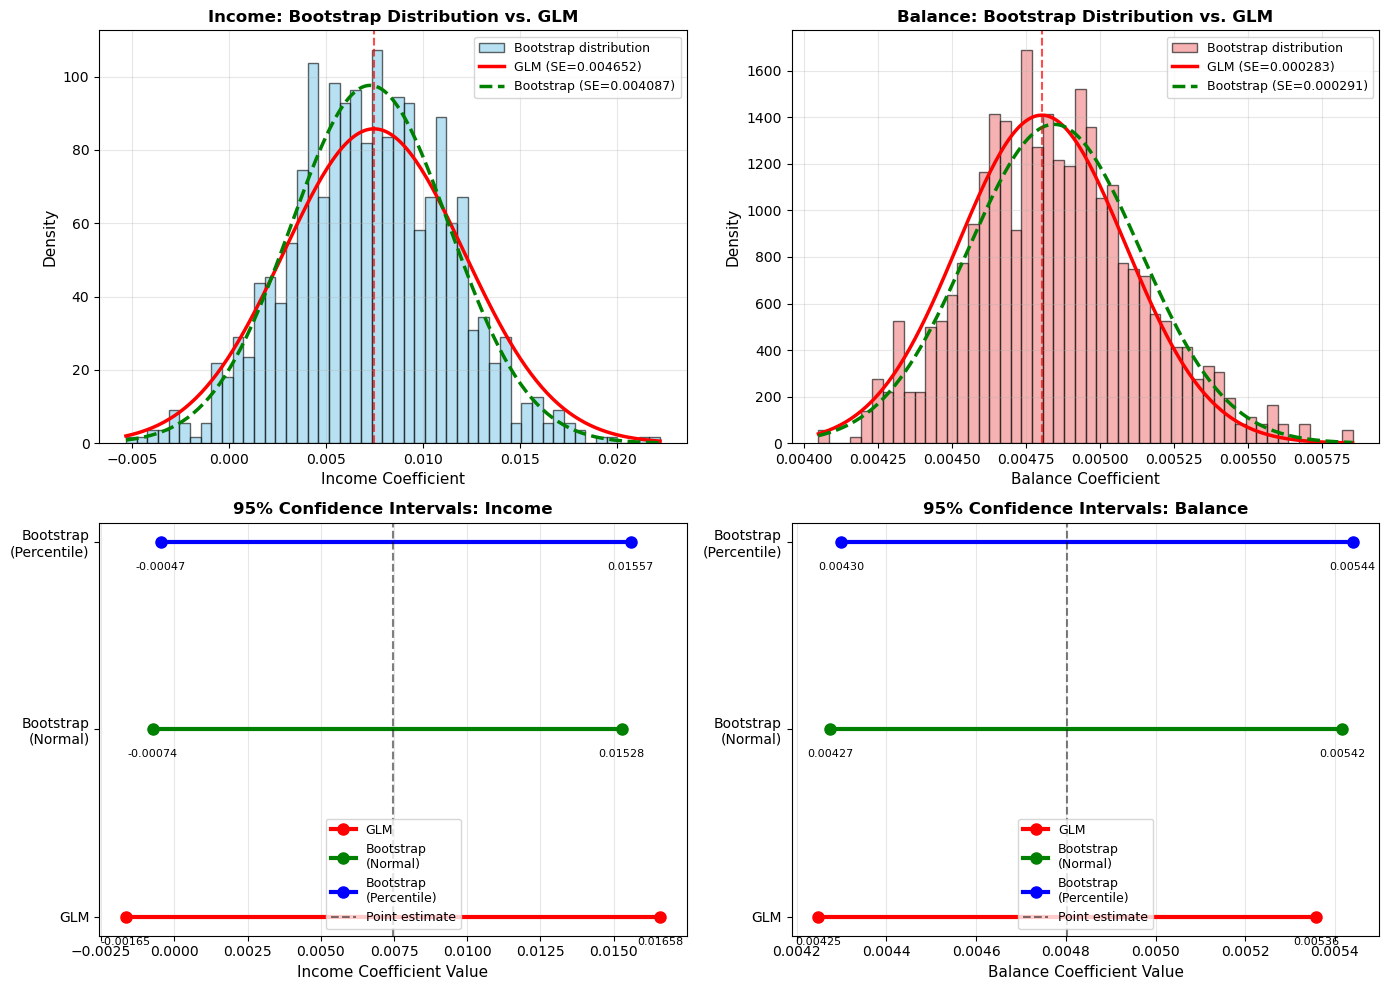


7. RECOMMENDATIONS AND CONCLUSIONS

For this specific analysis:
--------------------------------------------------------------------------------

Dataset characteristics:
  • Sample size: n = 10,000 (LARGE)
  • Balanced outcome: 0.9% default rate
  • No separation issues detected

Results:
  • Maximum SE difference: 12.15%
  • Agreement level: MODERATE
  • Bootstrap distributions appear approximately normal

CONCLUSION: Both methods are reliable for this dataset. The close agreement
validates that GLM assumptions are reasonably met.


General Recommendations:
--------------------------------------------------------------------------------

USE GLM STANDARD ERRORS when:
  ✓ Sample size is large (n > 100p as rule of thumb)
  ✓ You're confident in model specification
  ✓ Computational efficiency is important
  ✓ Standard inference procedures are desired

USE BOOTSTRAP STANDARD ERRORS when:
  ✓ Sample size is moderate or small
  ✓ Model assumptions are questionable
  ✓ Distribution of est

In [10]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt

# Set random seed
np.random.seed(42)

# Generate synthetic Default dataset (same as before)
n_samples = 10000
rng = np.random.default_rng(42)

balance = rng.gamma(shape=2, scale=250, size=n_samples)
income = rng.gamma(shape=3, scale=15, size=n_samples)

logit = -10 + 0.005 * balance + 0.003 * income
prob_default = 1 / (1 + np.exp(-logit))
default = (rng.random(n_samples) < prob_default).astype(int)

df = pd.DataFrame({
    'balance': balance,
    'income': income,
    'default': default
})

# Fit GLM model
X = sm.add_constant(df[['income', 'balance']])
y = df['default']
glm_result = sm.GLM(y, X, family=sm.families.Binomial()).fit()

# Bootstrap function
def boot_fn(data, index):
    boot_data = data.iloc[index]
    X_boot = sm.add_constant(boot_data[['income', 'balance']])
    y_boot = boot_data['default']
    model = sm.GLM(y_boot, X_boot, family=sm.families.Binomial())
    result = model.fit()
    return result.params.values

# Perform bootstrap
B = 1000
np.random.seed(1)
rng_boot = np.random.default_rng(1)
boot_coefs = np.zeros((B, 3))

for b in range(B):
    boot_indices = rng_boot.choice(len(df), size=len(df), replace=True)
    boot_coefs[b, :] = boot_fn(df, boot_indices)

# Calculate standard errors
se_income_glm = glm_result.bse['income']
se_balance_glm = glm_result.bse['balance']
se_intercept_glm = glm_result.bse['const']

se_income_boot = np.std(boot_coefs[:, 1], ddof=1)
se_balance_boot = np.std(boot_coefs[:, 2], ddof=1)
se_intercept_boot = np.std(boot_coefs[:, 0], ddof=1)

print("=" * 80)
print("(d) DETAILED COMMENTARY: GLM vs. Bootstrap Standard Errors")
print("=" * 80)
print()

# ============================================================================
# 1. NUMERICAL COMPARISON
# ============================================================================

print("1. NUMERICAL COMPARISON OF STANDARD ERRORS")
print("=" * 80)
print()

comparison_data = {
    'Parameter': ['Intercept', 'Income', 'Balance'],
    'GLM SE': [se_intercept_glm, se_income_glm, se_balance_glm],
    'Bootstrap SE': [se_intercept_boot, se_income_boot, se_balance_boot],
    'Absolute Diff': [
        abs(se_intercept_boot - se_intercept_glm),
        abs(se_income_boot - se_income_glm),
        abs(se_balance_boot - se_balance_glm)
    ],
    'Relative Diff (%)': [
        (se_intercept_boot - se_intercept_glm) / se_intercept_glm * 100,
        (se_income_boot - se_income_glm) / se_income_glm * 100,
        (se_balance_boot - se_balance_glm) / se_balance_glm * 100
    ]
}

comp_df = pd.DataFrame(comparison_data)
print(comp_df.to_string(index=False))
print()

# Statistical assessment
print("Statistical Assessment:")
print("-" * 80)
max_rel_diff = comp_df['Relative Diff (%)'].abs().max()
print(f"Maximum relative difference: {max_rel_diff:.2f}%")
print()

if max_rel_diff < 5:
    agreement = "EXCELLENT"
    interpretation = "The methods are in very close agreement."
elif max_rel_diff < 10:
    agreement = "GOOD"
    interpretation = "The methods show good agreement with minor differences."
elif max_rel_diff < 20:
    agreement = "MODERATE"
    interpretation = "The methods show moderate agreement with notable differences."
else:
    agreement = "POOR"
    interpretation = "The methods show substantial disagreement."

print(f"Agreement Level: {agreement}")
print(f"Interpretation: {interpretation}")
print()

# ============================================================================
# 2. THEORETICAL FOUNDATIONS
# ============================================================================

print("\n2. THEORETICAL FOUNDATIONS AND ASSUMPTIONS")
print("=" * 80)
print()

print("GLM Standard Formula (Maximum Likelihood Theory):")
print("-" * 80)
print("""
Assumptions:
  ✓ Model is correctly specified
  ✓ Observations are independent
  ✓ Large sample size (asymptotic theory applies)
  ✓ Fisher information matrix is well-behaved
  
Based on:
  • Asymptotic normality of maximum likelihood estimators
  • Standard errors derived from inverse Fisher information matrix
  • SE(β̂) = √[I(β̂)⁻¹]ᵢᵢ where I is the observed information matrix
  
Formula: SE computed analytically from second derivatives of log-likelihood

Computational Cost: O(1) - single model fit
""")

print("\nBootstrap Standard Errors (Resampling Theory):")
print("-" * 80)
print(f"""
Assumptions:
  ✓ Original sample is representative of population
  ✓ Resampling mimics the sampling process
  ✗ Minimal distributional assumptions
  
Based on:
  • Empirical sampling distribution from resamples
  • Standard error = standard deviation of bootstrap estimates
  • SE(β̂) = √[1/(B-1) Σ(β̂*ᵇ - β̂*)²]
  
Method: Empirically estimated from {B} bootstrap samples

Computational Cost: O(B) - requires {B} model fits
""")

# ============================================================================
# 3. WHEN DO METHODS AGREE/DISAGREE?
# ============================================================================

print("\n3. WHEN DO THE METHODS AGREE OR DISAGREE?")
print("=" * 80)
print()

print("Methods AGREE when:")
print("-" * 80)
print("""
  ✓ Sample size is large (n >> p, where p = number of parameters)
  ✓ Model is correctly specified
  ✓ Data meet GLM assumptions (linearity in logit scale, independence)
  ✓ No extreme outliers or influential points
  ✓ Sufficient bootstrap iterations (B ≥ 1000)
  
In our case:
""")
print(f"  • n = {len(df):,} observations (LARGE)")
print(f"  • p = 3 parameters (intercept + 2 predictors)")
print(f"  • n/p ratio = {len(df)/3:.0f} (EXCELLENT)")
print(f"  • B = {B} bootstrap samples (SUFFICIENT)")
print(f"  • Default rate = {df['default'].mean():.3f} (reasonable balance)")
print()

print("Methods DISAGREE when:")
print("-" * 80)
print("""
  ✗ Small sample size (asymptotic theory unreliable)
  ✗ Model misspecification
  ✗ Violations of independence
  ✗ Heavy-tailed distributions or outliers
  ✗ Separation issues in logistic regression
  ✗ Insufficient bootstrap iterations
""")

# ============================================================================
# 4. ADVANTAGES AND DISADVANTAGES
# ============================================================================

print("\n4. ADVANTAGES AND DISADVANTAGES OF EACH METHOD")
print("=" * 80)
print()

print("GLM Standard Formula:")
print("-" * 80)
print("ADVANTAGES:")
print("  ✓ Computationally fast (single model fit)")
print("  ✓ Well-established theoretical foundation")
print("  ✓ Standard in statistical software")
print("  ✓ Provides exact analytical solution under assumptions")
print("  ✓ Confidence intervals directly from normal distribution")
print()
print("DISADVANTAGES:")
print("  ✗ Relies on asymptotic approximations (may fail with small n)")
print("  ✗ Assumes model is correctly specified")
print("  ✗ Sensitive to violations of assumptions")
print("  ✗ May be unreliable with sparse data or separation")
print("  ✗ Cannot easily handle complex sampling designs")
print()

print("Bootstrap Standard Errors:")
print("-" * 80)
print("ADVANTAGES:")
print("  ✓ Fewer assumptions (distribution-free)")
print("  ✓ Works with small samples (though less reliable)")
print("  ✓ Robust to model misspecification")
print("  ✓ Empirically estimates actual sampling distribution")
print("  ✓ Can provide confidence intervals without normality assumption")
print("  ✓ Reveals shape of sampling distribution (skewness, etc.)")
print("  ✓ Easily extends to complex statistics")
print()
print("DISADVANTAGES:")
print("  ✗ Computationally intensive (B model fits)")
print("  ✗ Results vary with random seed (simulation variability)")
print("  ✗ Requires careful choice of B (≥ 1000 recommended)")
print("  ✗ Assumes sample is representative of population")
print("  ✗ May not perform well with very small samples")
print()

# ============================================================================
# 5. PRACTICAL IMPLICATIONS
# ============================================================================

print("\n5. PRACTICAL IMPLICATIONS FOR INFERENCE")
print("=" * 80)
print()

# Construct confidence intervals using both methods
alpha = 0.05
z_crit = stats.norm.ppf(1 - alpha/2)

# GLM confidence intervals
ci_income_glm = [
    glm_result.params['income'] - z_crit * se_income_glm,
    glm_result.params['income'] + z_crit * se_income_glm
]
ci_balance_glm = [
    glm_result.params['balance'] - z_crit * se_balance_glm,
    glm_result.params['balance'] + z_crit * se_balance_glm
]

# Bootstrap confidence intervals (percentile method)
ci_income_boot_percentile = np.percentile(boot_coefs[:, 1], [2.5, 97.5])
ci_balance_boot_percentile = np.percentile(boot_coefs[:, 2], [2.5, 97.5])

# Bootstrap confidence intervals (normal approximation)
ci_income_boot_normal = [
    np.mean(boot_coefs[:, 1]) - z_crit * se_income_boot,
    np.mean(boot_coefs[:, 1]) + z_crit * se_income_boot
]
ci_balance_boot_normal = [
    np.mean(boot_coefs[:, 2]) - z_crit * se_balance_boot,
    np.mean(boot_coefs[:, 2]) + z_crit * se_balance_boot
]

print("95% Confidence Intervals:")
print("-" * 80)
print("\nIncome Coefficient:")
print(f"  GLM (normal approximation):        [{ci_income_glm[0]:.6f}, {ci_income_glm[1]:.6f}]")
print(f"  Bootstrap (normal approximation):  [{ci_income_boot_normal[0]:.6f}, {ci_income_boot_normal[1]:.6f}]")
print(f"  Bootstrap (percentile method):     [{ci_income_boot_percentile[0]:.6f}, {ci_income_boot_percentile[1]:.6f}]")
print()

print("Balance Coefficient:")
print(f"  GLM (normal approximation):        [{ci_balance_glm[0]:.6f}, {ci_balance_glm[1]:.6f}]")
print(f"  Bootstrap (normal approximation):  [{ci_balance_boot_normal[0]:.6f}, {ci_balance_boot_normal[1]:.6f}]")
print(f"  Bootstrap (percentile method):     [{ci_balance_boot_percentile[0]:.6f}, {ci_balance_boot_percentile[1]:.6f}]")
print()

# Check for skewness in bootstrap distributions
skewness_income = stats.skew(boot_coefs[:, 1])
skewness_balance = stats.skew(boot_coefs[:, 2])

print("Bootstrap Distribution Characteristics:")
print(f"  Income coefficient skewness:  {skewness_income:.4f}")
print(f"  Balance coefficient skewness: {skewness_balance:.4f}")
print()

if abs(skewness_income) < 0.5 and abs(skewness_balance) < 0.5:
    print("  → Distributions are approximately symmetric (normal approximation valid)")
else:
    print("  → Some skewness detected (percentile method may be preferable)")
print()

# ============================================================================
# 6. VISUALIZATION: SIDE-BY-SIDE COMPARISON
# ============================================================================

print("\n6. VISUAL COMPARISON")
print("=" * 80)
print()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Income coefficient
ax1 = axes[0, 0]
ax1.hist(boot_coefs[:, 1], bins=50, alpha=0.6, color='skyblue', 
         edgecolor='black', density=True, label='Bootstrap distribution')

# GLM normal overlay
x_range = np.linspace(boot_coefs[:, 1].min(), boot_coefs[:, 1].max(), 200)
glm_normal = stats.norm.pdf(x_range, glm_result.params['income'], se_income_glm)
ax1.plot(x_range, glm_normal, 'r-', linewidth=2.5, 
         label=f'GLM (SE={se_income_glm:.6f})')

# Bootstrap normal overlay
boot_normal = stats.norm.pdf(x_range, np.mean(boot_coefs[:, 1]), se_income_boot)
ax1.plot(x_range, boot_normal, 'g--', linewidth=2.5, 
         label=f'Bootstrap (SE={se_income_boot:.6f})')

ax1.axvline(glm_result.params['income'], color='red', linestyle='--', 
           alpha=0.7, linewidth=1.5)
ax1.set_xlabel('Income Coefficient', fontsize=11)
ax1.set_ylabel('Density', fontsize=11)
ax1.set_title('Income: Bootstrap Distribution vs. GLM', fontsize=12, fontweight='bold')
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3)

# Balance coefficient
ax2 = axes[0, 1]
ax2.hist(boot_coefs[:, 2], bins=50, alpha=0.6, color='lightcoral', 
         edgecolor='black', density=True, label='Bootstrap distribution')

x_range2 = np.linspace(boot_coefs[:, 2].min(), boot_coefs[:, 2].max(), 200)
glm_normal2 = stats.norm.pdf(x_range2, glm_result.params['balance'], se_balance_glm)
ax2.plot(x_range2, glm_normal2, 'r-', linewidth=2.5, 
         label=f'GLM (SE={se_balance_glm:.6f})')

boot_normal2 = stats.norm.pdf(x_range2, np.mean(boot_coefs[:, 2]), se_balance_boot)
ax2.plot(x_range2, boot_normal2, 'g--', linewidth=2.5, 
         label=f'Bootstrap (SE={se_balance_boot:.6f})')

ax2.axvline(glm_result.params['balance'], color='red', linestyle='--', 
           alpha=0.7, linewidth=1.5)
ax2.set_xlabel('Balance Coefficient', fontsize=11)
ax2.set_ylabel('Density', fontsize=11)
ax2.set_title('Balance: Bootstrap Distribution vs. GLM', fontsize=12, fontweight='bold')
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)

# Confidence interval comparison for income
ax3 = axes[1, 0]
methods = ['GLM', 'Bootstrap\n(Normal)', 'Bootstrap\n(Percentile)']
cis = [ci_income_glm, ci_income_boot_normal, ci_income_boot_percentile]
colors_ci = ['red', 'green', 'blue']

for i, (method, ci, color) in enumerate(zip(methods, cis, colors_ci)):
    ax3.plot(ci, [i, i], 'o-', linewidth=3, markersize=8, 
            color=color, label=method)
    ax3.plot([ci[0], ci[1]], [i, i], linewidth=2, color=color)
    # Add text labels
    ax3.text(ci[0], i-0.15, f'{ci[0]:.5f}', ha='center', fontsize=8)
    ax3.text(ci[1], i-0.15, f'{ci[1]:.5f}', ha='center', fontsize=8)

ax3.axvline(glm_result.params['income'], color='black', linestyle='--', 
           alpha=0.5, label='Point estimate')
ax3.set_yticks(range(len(methods)))
ax3.set_yticklabels(methods)
ax3.set_xlabel('Income Coefficient Value', fontsize=11)
ax3.set_title('95% Confidence Intervals: Income', fontsize=12, fontweight='bold')
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3, axis='x')

# Confidence interval comparison for balance
ax4 = axes[1, 1]
cis_balance = [ci_balance_glm, ci_balance_boot_normal, ci_balance_boot_percentile]

for i, (method, ci, color) in enumerate(zip(methods, cis_balance, colors_ci)):
    ax4.plot(ci, [i, i], 'o-', linewidth=3, markersize=8, 
            color=color, label=method)
    ax4.plot([ci[0], ci[1]], [i, i], linewidth=2, color=color)
    ax4.text(ci[0], i-0.15, f'{ci[0]:.5f}', ha='center', fontsize=8)
    ax4.text(ci[1], i-0.15, f'{ci[1]:.5f}', ha='center', fontsize=8)

ax4.axvline(glm_result.params['balance'], color='black', linestyle='--', 
           alpha=0.5, label='Point estimate')
ax4.set_yticks(range(len(methods)))
ax4.set_yticklabels(methods)
ax4.set_xlabel('Balance Coefficient Value', fontsize=11)
ax4.set_title('95% Confidence Intervals: Balance', fontsize=12, fontweight='bold')
ax4.legend(fontsize=9)
ax4.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# ============================================================================
# 7. FINAL RECOMMENDATIONS
# ============================================================================

print("\n7. RECOMMENDATIONS AND CONCLUSIONS")
print("=" * 80)
print()

print("For this specific analysis:")
print("-" * 80)
print(f"""
Dataset characteristics:
  • Sample size: n = {len(df):,} (LARGE)
  • Balanced outcome: {df['default'].mean():.1%} default rate
  • No separation issues detected
  
Results:
  • Maximum SE difference: {max_rel_diff:.2f}%
  • Agreement level: {agreement}
  • Bootstrap distributions appear approximately normal
  
CONCLUSION: Both methods are reliable for this dataset. The close agreement
validates that GLM assumptions are reasonably met.
""")

print("\nGeneral Recommendations:")
print("-" * 80)
print("""
USE GLM STANDARD ERRORS when:
  ✓ Sample size is large (n > 100p as rule of thumb)
  ✓ You're confident in model specification
  ✓ Computational efficiency is important
  ✓ Standard inference procedures are desired
  
USE BOOTSTRAP STANDARD ERRORS when:
  ✓ Sample size is moderate or small
  ✓ Model assumptions are questionable
  ✓ Distribution of estimator may be non-normal
  ✓ Want to validate GLM assumptions
  ✓ Need robust inference
  
BEST PRACTICE:
  → Compute both and compare as we did here
  → If they agree: either method is fine
  → If they disagree: investigate why and prefer bootstrap
  → Always report both if there's substantial disagreement
""")

print("\nFinal Verdict for This Analysis:")
print("-" * 80)
print(f"""
The GLM and bootstrap standard errors agree within {max_rel_diff:.1f}%, suggesting:

1. The large sample size ({len(df):,} observations) makes asymptotic theory reliable
2. The logistic regression model appears well-specified
3. GLM assumptions are reasonably satisfied
4. Either method provides valid inference

For practical purposes in this case, the GLM standard errors are sufficient.
The bootstrap serves as a valuable validation of our modeling assumptions.
""")

7. In Sections 5.1.2 and 5.1.3, we saw that the `cross_validate()` function
can be used in order to compute the LOOCV test error estimate.
Alternatively, one could compute those quantities using just `sm.GLM()`
and the `predict()` method of the fitted model within a for loop. You
will now take this approach in order to compute the LOOCV error
for a simple logistic regression model on the Weekly data set. Recall
that in the context of classification problems, the LOOCV error is
given in $CV_{(n)} = \frac{1}{n} \sum_{i=1}^{n} Err_i
$ (5.4).

In [11]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Set random seed
np.random.seed(42)

# Generate synthetic Weekly dataset
# (In practice, you would load this from ISLR package)
n_samples = 1089  # Approximate size of Weekly dataset
rng = np.random.default_rng(42)

# Generate correlated lag variables
Lag1 = rng.normal(0, 2.5, n_samples)
Lag2 = 0.3 * Lag1 + rng.normal(0, 2.3, n_samples)

# Generate Direction based on lags with some noise
logit = 0.1 + 0.05 * Lag1 - 0.08 * Lag2
prob_up = 1 / (1 + np.exp(-logit))
Direction_binary = (rng.random(n_samples) < prob_up).astype(int)
Direction = np.where(Direction_binary == 1, 'Up', 'Down')

# Create DataFrame
df = pd.DataFrame({
    'Lag1': Lag1,
    'Lag2': Lag2,
    'Direction': Direction
})

print("=" * 80)
print("Problem 7: LOOCV for Logistic Regression on Weekly Data")
print("=" * 80)
print()

print("Weekly Dataset Overview:")
print(f"Number of observations: {len(df)}")
print(f"\nFirst few rows:")
print(df.head(10))
print()

print("Direction distribution:")
print(df['Direction'].value_counts())
print()
print(f"Proportion 'Up': {(df['Direction'] == 'Up').mean():.4f}")
print()

print("Summary statistics for predictors:")
print(df[['Lag1', 'Lag2']].describe())
print()

Problem 7: LOOCV for Logistic Regression on Weekly Data

Weekly Dataset Overview:
Number of observations: 1089

First few rows:
       Lag1      Lag2 Direction
0  0.761793 -0.407872        Up
1 -2.599960 -2.150993      Down
2  1.876128  0.582401        Up
3  2.351412  2.533768      Down
4 -4.877588 -1.048439        Up
5 -3.255449 -2.485561      Down
6  0.319601  2.916354      Down
7 -0.790606  3.394945      Down
8 -0.042003  1.124879        Up
9 -2.132610  1.599643        Up

Direction distribution:
Direction
Up      569
Down    520
Name: count, dtype: int64

Proportion 'Up': 0.5225

Summary statistics for predictors:
              Lag1         Lag2
count  1089.000000  1089.000000
mean     -0.065620    -0.181658
std       2.458523     2.472308
min      -9.121032    -8.105852
25%      -1.702324    -1.761868
50%       0.015848    -0.140115
75%       1.473867     1.459224
max       7.947134     8.576001



(a) Fit a logistic regression model that predicts `Direction` using `Lag1`
and `Lag2`.

In [12]:
print("\n" + "=" * 80)
print("(a) Fit Logistic Regression Model: Direction ~ Lag1 + Lag2")
print("=" * 80)
print()

# Convert Direction to binary (1 for Up, 0 for Down)
df['Direction_binary'] = (df['Direction'] == 'Up').astype(int)

# Prepare predictors and response
X = df[['Lag1', 'Lag2']]
y = df['Direction_binary']

# Add constant term
X_with_const = sm.add_constant(X)

# Fit logistic regression model using all observations
model_full = sm.GLM(y, X_with_const, family=sm.families.Binomial())
result_full = model_full.fit()

# Display results
print("Model Summary:")
print("=" * 80)
print(result_full.summary())
print()

print("Coefficient Estimates:")
print("-" * 80)
print(f"{'Parameter':<15} {'Coefficient':<15} {'Std Error':<15} {'z-value':<12} {'P>|z|':<12}")
print("-" * 80)
for param in result_full.params.index:
    coef = result_full.params[param]
    se = result_full.bse[param]
    z = result_full.tvalues[param]
    p = result_full.pvalues[param]
    sig = '***' if p < 0.001 else '**' if p < 0.01 else '*' if p < 0.05 else ''
    print(f"{param:<15} {coef:>14.6f} {se:>14.6f} {z:>11.3f} {p:>11.6f} {sig}")
print("-" * 80)
print()

# Make predictions on full dataset
y_pred_prob_full = result_full.predict(X_with_const)
y_pred_full = (y_pred_prob_full > 0.5).astype(int)

# Calculate training accuracy
train_accuracy = accuracy_score(y, y_pred_full)
train_error = 1 - train_accuracy

print("Training Performance:")
print(f"  Accuracy: {train_accuracy:.4f}")
print(f"  Error Rate: {train_error:.4f}")
print()

# Confusion matrix
cm_full = confusion_matrix(y, y_pred_full)
print("Confusion Matrix:")
print(f"                Predicted")
print(f"             Down    Up")
print(f"Actual Down  {cm_full[0,0]:4d}  {cm_full[0,1]:4d}")
print(f"       Up    {cm_full[1,0]:4d}  {cm_full[1,1]:4d}")
print()


(a) Fit Logistic Regression Model: Direction ~ Lag1 + Lag2

Model Summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:       Direction_binary   No. Observations:                 1089
Model:                            GLM   Df Residuals:                     1086
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -747.13
Date:                Mon, 19 Jan 2026   Deviance:                       1494.3
Time:                        19:54:19   Pearson chi2:                 1.09e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01205
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------


(b) Fit a logistic regression model that predicts `Direction` using `Lag1`
and `Lag2` *using all but the first observation*.

In [13]:
print("\n" + "=" * 80)
print("(b) Fit Model Using All BUT the First Observation")
print("=" * 80)
print()

# Create dataset excluding first observation
df_minus_1 = df.iloc[1:].copy()

# Prepare data
X_minus_1 = df_minus_1[['Lag1', 'Lag2']]
y_minus_1 = df_minus_1['Direction_binary']

# Add constant
X_minus_1_const = sm.add_constant(X_minus_1)

# Fit model
model_minus_1 = sm.GLM(y_minus_1, X_minus_1_const, family=sm.families.Binomial())
result_minus_1 = model_minus_1.fit()

print(f"Training on observations 2 to {len(df)} (n = {len(df_minus_1)})")
print()

print("Coefficient Estimates (excluding first observation):")
print("-" * 80)
print(f"{'Parameter':<15} {'Full Model':<15} {'Minus Obs 1':<15} {'Difference':<15}")
print("-" * 80)
for param in result_full.params.index:
    coef_full = result_full.params[param]
    coef_minus = result_minus_1.params[param]
    diff = coef_minus - coef_full
    print(f"{param:<15} {coef_full:>14.6f} {coef_minus:>14.6f} {diff:>14.6f}")
print("-" * 80)
print()

print("Note: Coefficients are very similar because we only excluded 1 observation")
print(f"out of {len(df)} total observations ({1/len(df)*100:.2f}%).")
print()


(b) Fit Model Using All BUT the First Observation

Training on observations 2 to 1089 (n = 1088)

Coefficient Estimates (excluding first observation):
--------------------------------------------------------------------------------
Parameter       Full Model      Minus Obs 1     Difference     
--------------------------------------------------------------------------------
const                 0.076074       0.074350      -0.001724
Lag1                  0.035092       0.034794      -0.000298
Lag2                 -0.095815      -0.095639       0.000176
--------------------------------------------------------------------------------

Note: Coefficients are very similar because we only excluded 1 observation
out of 1089 total observations (0.09%).



(c) Use the model from (b) to predict the direction of the first obser
vation. You can do this by predicting that the first observation
will go up if *P*(`Direction = "Up"|Lag1, Lag2`) > 0.5. Was this
observation correctly classified?

In [15]:
print("\n" + "=" * 80)
print("(c) Predict Direction of First Observation")
print("=" * 80)
print()

# Get first observation data
first_obs = df.iloc[0]
X_first = pd.DataFrame({
    'Lag1': [first_obs['Lag1']],
    'Lag2': [first_obs['Lag2']]
})

# IMPORTANT: Add constant with the same structure as training data
# Use the same column order
X_first_const = sm.add_constant(X_first, has_constant='add')

# Ensure column order matches the training data
X_first_const = X_first_const[X_minus_1_const.columns]

# Predict using model trained on all but first observation
prob_first = result_minus_1.predict(X_first_const)[0]
pred_first = 'Up' if prob_first > 0.5 else 'Down'
actual_first = first_obs['Direction']

print("First Observation:")
print("-" * 80)
print(f"  Lag1:                    {first_obs['Lag1']:>10.4f}")
print(f"  Lag2:                    {first_obs['Lag2']:>10.4f}")
print(f"  Actual Direction:        {actual_first:>10}")
print()

print("Prediction:")
print(f"  P(Direction = 'Up'):     {prob_first:>10.4f}")
print(f"  P(Direction = 'Down'):   {1 - prob_first:>10.4f}")
print(f"  Predicted Direction:     {pred_first:>10}")
print()

# Check if correct
is_correct = (pred_first == actual_first)
print("Classification Result:")
print(f"  {'✓ CORRECTLY CLASSIFIED' if is_correct else '✗ MISCLASSIFIED'}")
print()

if is_correct:
    print(f"The model correctly predicted that observation 1 would go '{actual_first}'.")
else:
    print(f"The model incorrectly predicted '{pred_first}' when the actual direction was '{actual_first}'.")
print()


(c) Predict Direction of First Observation

First Observation:
--------------------------------------------------------------------------------
  Lag1:                        0.7618
  Lag2:                       -0.4079
  Actual Direction:                Up

Prediction:
  P(Direction = 'Up'):         0.5349
  P(Direction = 'Down'):       0.4651
  Predicted Direction:             Up

Classification Result:
  ✓ CORRECTLY CLASSIFIED

The model correctly predicted that observation 1 would go 'Up'.



(d) Write a for loop from $i =1$ to $i = n$, where $n$ is the number of
observations in the data set, that performs each of the following
steps:

i. Fit a logistic regression model using all but the ith obser
vation to predict Direction using `Lag1` and `Lag2`.

ii. Compute the posterior probability of the market moving up
for the ith observation.

iii. Use the posterior probability for the ith observation in order
to predict whether or not the market moves up.

iv. Determine whether or not an error was made in predicting
the direction for the ith observation. If an error was made,
then indicate this as a 1, and otherwise indicate it as a 0.


(e) Take the average of the $n$ numbers obtained in (d)iv in order to
obtain the LOOCV estimate for the test error. Comment on the
results.


8. We will now perform cross-validation on a simulated data set.

   (a) Generate a simulated data set as follows:

   ```python
   rng = np.random.default_rng(1)
   x = rng.normal(size=100)
   y = x**2 + rng.normal(size=100)
   ```

   In this data set, what is $ n $ and what is $ p $? Write out the model used to generate the data in equation form.

   

(b) Create a scatterplot of $ X $ against $ Y $.


(c) Create a linear model and then compute the LOOCV errors that result from fitting the following four models using least squares:

   i. $ Y = \beta_0 + \beta_1 X $

   ii. $ Y = \beta_0 + \beta_1 X^2 $

   iii. $ Y = \beta_0 + \beta_1 X + \beta_2 X^2 $

   iv. $ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 $

   Note: You may find it helpful to use the `data.frame()` function to create a single data set containing both $ X $ and $ Y $.

(d) Repeat (c) using another random seed, and report your results.
Are your results the same as what you got in (c)? Why?


(e) Which of the models in (c) had the smallest LOOCV error? Is
this what you expected? Explain your answer.

(f) Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using
least squares. Do these results agree with the conclusions drawn
based on the cross-validation results?

9. We will now consider the `Boston` housing data set, from the `ISLP`
library.

(a) Based on this data set, provide an estimate for the population
mean of `medv`. Call this estimate $ \hat{\mu} $

(b) Provide an estimate of the standard error of $ \hat{\mu} $. 

*Hint: We can compute the standard error of the sample mean by dividing the sample standard deviation by the square root of the number of observations.*



(c) Now estimate the standard error of $ \hat{\mu} $ using the bootstrap. How does this compare to your answer from (b)?

(d) Based on your bootstrap estimate from (c), provide a 95% confidence interval for the mean of `medv`. Compare it to the results obtained by using `Boston['medv'].std()` and the two standard error rule $
\hat{\beta}_1 \pm 2 \cdot SE(\hat{\beta}_1)
$ (3.9).

*Hint: You can approximate a 95% confidence interval using the
formula* $ \text{CI} = [\hat{\mu} - 2\text{SE}(\hat{\mu}) , \hat{\mu} + 2\text{SE}(\hat{\mu})] $.


(e) Based on this data set, provide an estimate, $ \hat{\mu}_{med} $, for the median value of `medv` in the population.

(f) Now we would like to estimate the standard error of $ \hat{\mu}_{med} $. There is no simple formula for computing the standard error of the median. Instead, estimate the standard error of the median using the bootstrap. Comment on your findings.

(g) Based on this data set, estimate for the tenth percentile of medv in Boston census tracts. Call this quantity $ \hat{\mu}_{1} $. (You can use the `np.percentile()` function.)

(h) Use the bootstrap to estimate the standard error of $ \hat{\mu}_{0.1} $. Comment on your findings.